
# <h1 style="font-family: Trebuchet MS; padding: 5px; font-size: 48px; color: gold; text-align: center; line-height: 1;"><b>Natural Language Processing</br><span style="color: #000000; font-size: 30px;"> CATEGORY CLASSIFICATION </span></b></h1>
<center><img src="https://i.imgur.com/teaObK3.png" ></center>


### DATASET : dmoz

<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">بسم الله الرحمن الرحيم</p>

<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">السلام عليكم ورحمة الله وبركاته</p>


**Overview:**
* This notebook aims to give you a brief overview of performing text classification using Naive Bayes, Logistic Regression and Support Vector Machines.
* We will be using a dataset called "dmoz". which consists of approximately 1190000 news articles.
* Our goal in this notebook is to explore the process of text classifiers for this problem.
* We will use Two Different approach for Model three text classification algorithms: 
     * Machine Learning
     * Deep Learning


<a id="0"></a>


---

## **Table of Contents:**
1. [Context](#1)
2. [Import Libraries](#2)
3. [Import Data](#3)
4. [Data Cleaning](#4)
    1. [Removing Unwanted Columns](#5)
5. [Data Understanding](#6)
6. [Analysing text statistics](#7)
    1. [Number of Characters Present in Each Sentence of desc](#8)
    2. [Number of Words Appearing in Each description](#9)
    3. [Check the Average Word Length in Each Sentence](#10)
    4. [Analyzing the Amount and the Types of Stopwords](#11)
    5. [Analyzing the Amount and the Types of Punctuation](#12)
    6. [Top Non Stopwords](#13)
    7. [Visualizing Categories Using Pie Chart ](#14)
    8. [Visualizing Categories Using Countplot](#15)
    9. [Number of Characters Present in Each Sentence of Description According to the Category](#16)
    10. [Number of Words Appearing in Each Description According To The Category](#17)
    11. [Average Word Length in Each Sentence For Each Category](#18)
    12. [Generating Word Cloud For description ](#19)
    13. [Generating Word Cloud For description per category](#20)
    14. [Generating Word Cloud For title](#21)
7. [Text Preprocessing](#22)
    1. [Lower Casing](#23)
    2. [Map Punctuation to space](#24)
    3. [Removal of Stopwords](#25)
    4. [Removal of Frequent words](#26)
    5. [Removal of Rare words](#27)
    6. [Removal of Numbers](#28)
    7. [Removal of Single Characters](#29)
    7. [Removal of White Spaces](#30)
    8. [Lemmatization & Tokenization ](#31)
    9. [Converting List to String](#32)
8. [Cleaned Data with Number of Characters](#33)
    1. [Before Preprocessing](#34)
    2. [After Preprocessing ](#35)
1. [Machine Learning Approach](#36)
    1. [Encoding category column ](#37)
    1. [TfidfVectorizer](#38)
    1. [Feature Selection](#39)
    1. [Spliting Data](#40)
    1. [Modeling](#41)
        1. [LogisticRegression](#42)  
        1. [Light Gradient Boosting Classifier](#43)
        1. [Multinomial Naive Bayes](#44)
        1. [Support Vector Machines](#45)
            1. [Prepare final Data](#46)
        1. [Random Forest Classifier](#47)
    1. [Evaluation](#48)
2. [Deep Learning Approach](#49)
    1. [Prepare Data for the model](#50)
    2. [Building Model Architutre](#51)
    3. [Train Model](#52)
    4. [Evaluate Model](#53)



<a id='1'></a>

---

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:300%;text-align:center;border-radius:20px 20px;padding:18px">Context</p>

### Lets Talks about DMOZ and Familiar more about it:
* DMOZ is a directory of World Wide Web links, actively maintained from1998 till 2017.
* Links to Web pages contain a certain topic built in a hierarachical way.
* Top levels are, for example, ‘Business’ and ‘Sports’ and deeper in the directory exist lower levels with a path like ‘Science/Technology/Space’and ‘Recreation/Outdoors/Fishing’.

### Dataset consists of:
1. **Category** : class which contains 13 diffrent category  
2. **Title** : Title of Each Descreption
3. **Desc** : Description

 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>

--------
<a id='2'></a>
 <p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;padding:18px">Import Libraries</p>
<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

In [1]:
import pandas as pd # to work with csv files
import numpy as np

# matplotlib imports are used for visualisation and to plot confusion matrices for the classifiers
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score, confusion_matrix

# import time function from time module to track the training duration
from time import time

import warnings
warnings.filterwarnings('ignore')

sns.set()

---------
<a id="3"></a>

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;padding:18px">Import Data</p>
<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

In [2]:
data = pd.read_csv('dmoz.csv')
data.head()

Unnamed: 0 category                                              title  \
0           1     Arts                         About.com: Animation Guide   
1           2     Arts                                          Toonhound   
2           3     Arts  Enculturation: From Mouse to Mouse: Overcoming...   
3           4     Arts         Digital Media FX: The History of Animation   
4           5     Arts                Spark Online: Only Genius Is Genius   

                                                desc  
0  Keep up with developments in online animation ...  
1  British cartoon, animation and comic strip cre...  
2  Essay by Patricia Pisters on the animated imag...  
3  Michael Crandol takes an exhaustive look at th...  
4  Chris Romano feels that the proliferation of F...

In [3]:
data.shape

(1195851, 4)

----------
<a id="4"></a>

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;padding:18px">Data Cleaning</p>

<a id="5"></a>
* **Removing Unwanted Columns**

In [4]:
data=data.drop(['Unnamed: 0'], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195851 entries, 0 to 1195850
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   category  1195851 non-null  object
 1   title     1195851 non-null  object
 2   desc      1195851 non-null  object
dtypes: object(3)
memory usage: 27.4+ MB


In [6]:
data.describe()

category     title     desc
count    1195851   1195851  1195851
unique        13   1122645  1133703
top     Business  GameSpot    image
freq      204910      1608     1224

In [7]:
data.duplicated().sum()

7767

In [8]:
# Rows containing duplicate data
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows:", duplicate_rows_data.shape)
data=data.drop_duplicates()

number of duplicate rows: (7767, 3)


---------
<a id="6"></a>

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;padding:18px">Data Uderstanding</span></p>
<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

In [9]:
data.shape

(1188084, 3)

In [10]:
data.isna().sum()

category    0
title       0
desc        0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188084 entries, 0 to 1195850
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   category  1188084 non-null  object
 1   title     1188084 non-null  object
 2   desc      1188084 non-null  object
dtypes: object(3)
memory usage: 36.3+ MB


In [12]:
data.dtypes

category    object
title       object
desc        object
dtype: object

In [13]:
data.columns

Index(['category', 'title', 'desc'], dtype='object')

In [14]:
for col in data.columns:
    print('{} : {} unique value(s)'.format(col, data[col].nunique()))

category : 13 unique value(s)
title : 1122645 unique value(s)
desc : 1133703 unique value(s)


In [15]:
data.groupby('category').describe()

title                                                       desc  \
             count  unique                                  top  freq   count   
category                                                                        
Arts        192431  185232                          HARO Online   126  192431   
Business    204562  201339                Management Recruiters    33  204562   
Computers    92746   90245                 Hello, World program    20   92746   
Games        33405   27218                             GameSpot  1088   33405   
Health       50224   48760  Online Mendelian Inheritance in Man    24   50224   
Home         22197   21365                           Recipezaar    14   22197   
News          7468    7142                        The Chronicle     8    7468   
Recreation   83456   82222                      Bird Checklists    31   83456   
Reference    47125   42326                           Admissions    56   47125   
Science      96154   90487                  Stanford University    17   96154   
Shopping     78165   77563                           Floraleads     3   78165   
Society     195179  184002                Catholic Encyclopedia   131  195179   
Sports       84972   82609                            About.com    32   84972   

                                                                             
            unique                                                top  freq  
category                                                                     
Arts        171939                        Etext at Project Gutenberg.   598  
Business    204088                              Official preliminary.    27  
Computers    91960  Growing article, with links to many related to...    70  
Games        31758                                  Consumer reviews.   202  
Health       48448          Full prescribing information from RxList.   684  
Home         21821  Consumer-generated reviews, buying tips and ad...    90  
News          7410                Headline news and feature articles.    17  
Recreation   82935  History of Scouting and current status of nati...    70  
Reference    45892                                Animated GIF image.   152  
Science      87426                                              image   982  
Shopping     78085                    Fishing tackle and accessories.     7  
Society     188598                            (Catholic Encyclopedia)  1161  
Sports       75941  This Wikipedia entry includes club information...   354

In [16]:
class_df = data.groupby('category').count()['desc'].reset_index().sort_values(by='desc',ascending=False)
class_df.style.background_gradient()

In [17]:
data['Number of Characters in desc']= data['desc'].str.len()
data['Number of Characters in title']= data['title'].str.len()
data

category                                              title  \
0           Arts                         About.com: Animation Guide   
1           Arts                                          Toonhound   
2           Arts  Enculturation: From Mouse to Mouse: Overcoming...   
3           Arts         Digital Media FX: The History of Animation   
4           Arts                Spark Online: Only Genius Is Genius   
...          ...                                                ...   
1195846   Sports                                       MaxPreps.com   
1195847   Sports                                           My Score   
1195848   Sports             Sports Illustrated: High School Sports   
1195849   Sports             Sports Illustrated: High School Sports   
1195850   Sports                                   USA Today: Preps   

                                                      desc  \
0        Keep up with developments in online animation ...   
1        British cartoon, animation and comic strip cre...   
2        Essay by Patricia Pisters on the animated imag...   
3        Michael Crandol takes an exhaustive look at th...   
4        Chris Romano feels that the proliferation of F...   
...                                                    ...   
1195846  High school sports and athletes as well as spo...   
1195847  High school sports scores, standings, and sche...   
1195848  News, analysis, commentary, feature articles, ...   
1195849                 Headline news and feature stories.   
1195850  Features high school news and the Super 25 Ind...   

         Number of Characters in desc  Number of Characters in title  
0                                 122                             26  
1                                  91                              9  
2                                 103                             58  
3                                 145                             42  
4                                 157                             35  
...                               ...                            ...  
1195846                           153                             12  
1195847                           122                              8  
1195848                            57                             38  
1195849                            34                             38  
1195850                           134                             16  

[1188084 rows x 5 columns]

<a id="7"></a>

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;padding:18px">Analysing text statistics</p>

1. [Number of Characters Present in Each Sentence of desc](#8)
2. [Number of Words Appearing in Each description](#9)
3. [Check the Average Word Length in Each Sentence](#10)
4. [Analyzing the Amount and the Types of Stopwords](#11)
5. [Analyzing the Amount and the Types of Punctuation](#12)
6. [Top Non Stopwords](#13)
7. [Visualizing Categories Using Pie Chart ](#14)
8. [Visualizing Categories Using Countplot](#15)
9. [Number of Characters Present in Each Sentence of Description According to the Category](#16)
10. [Number of Words Appearing in Each Description According To The Category](#17)
11. [Average Word Length in Each Sentence For Each Category](#18)
12. [Generating Word Cloud For description ](#19)
13. [Generating Word Cloud For description per category](#20)
14. [Generating Word Cloud For title](#21)

<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

<a id="8"></a>

## 1. *Number of Characters Present in Each Sentence of desc* :

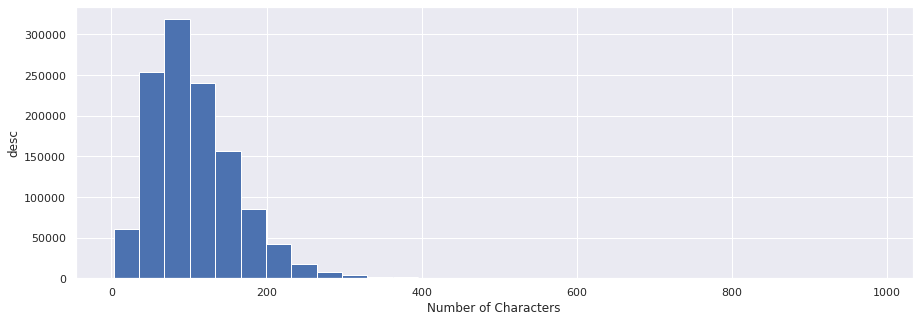

In [18]:
plt.figure(figsize=(15,5))
data['desc'].str.len().hist(bins=30)

plt.xlabel('Number of Characters')
plt.ylabel('desc')
plt.show()

In [19]:
data['Number of Characters in desc'].max()

984

**The histogram shows that desc range from 1 to 1000 characters and generally more it is b/w 1 to 300 characters.**

<a id="9"></a>

## 2. *Number of Words Appearing in Each description* :

In [20]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist(bins=30)

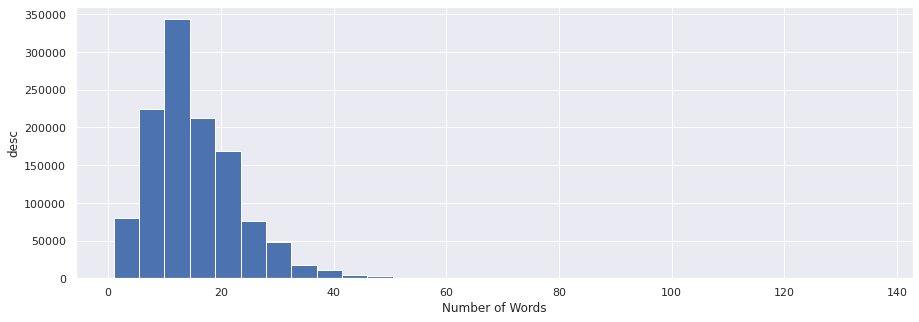

In [21]:
plt.figure(figsize=(15,5))
plot_word_number_histogram(data['desc'])
plt.xlabel('Number of Words')
plt.ylabel('desc')
plt.show()

<a id="10"></a>

## 3. *Check the Average Word Length in Each Sentence* :

In [22]:
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist(bins=30)

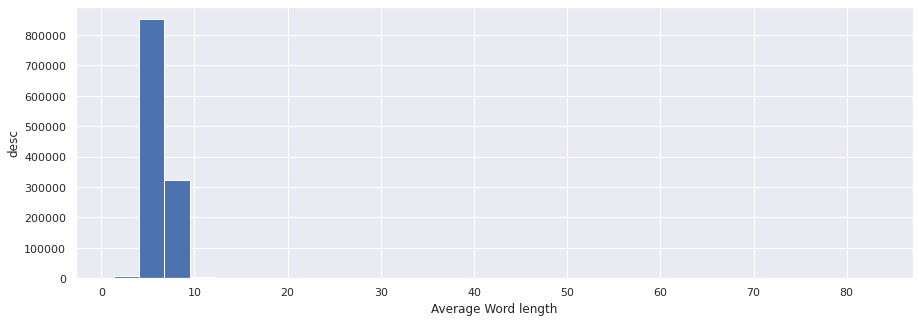

In [23]:
plt.figure(figsize=(15,5))
plot_word_length_histogram(data['desc'])

plt.xlabel('Average Word length')
plt.ylabel('desc')
plt.show()

<a id="11"></a>

## 4. *Analyzing the Amount and the Types of Stopwords* :

In [24]:
import re
import nltk
from nltk.corpus import stopwords

In [25]:
colors = list(mcolors.TABLEAU_COLORS.values())
colors.extend(['#87CCEB',"#FF7FF0"])
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y, color = colors[:10])

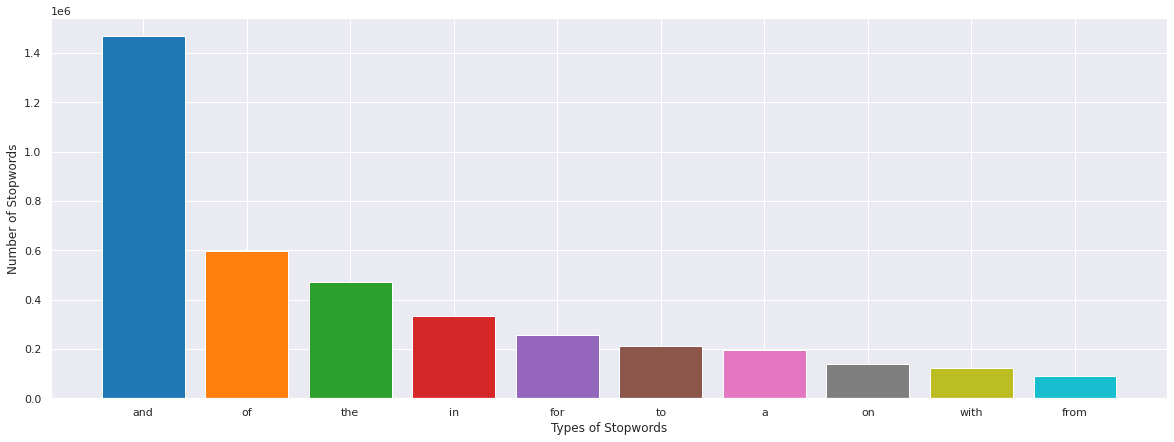

In [26]:
plt.figure(figsize=(20,7))
plot_top_stopwords_barchart(data['desc'])
plt.xlabel('Types of Stopwords')
plt.ylabel('Number of Stopwords')
plt.show()

<a id="12"></a>

## 5. *Analyzing the Amount and the Types of Punctuation* :

In [27]:
def plot_punc_barchart(text):
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    dic={}
    for word in corpus:
        if word in string.punctuation:
            if word in dic.keys():
                dic[word]+=1
            else:
                dic[word] = 1
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)
    x,y=zip(*top)
    plt.bar(x,y, color = colors[:10])

In [ ]:
plt.figure(figsize=(20,7))
plot_punc_barchart(data['desc'])
plt.xlabel('Types of Punctuation')
plt.ylabel('Number of Punctuation')
plt.show()

<a id="13"></a>

## 6. *Top Non Stopwords* :


In [28]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

In [29]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

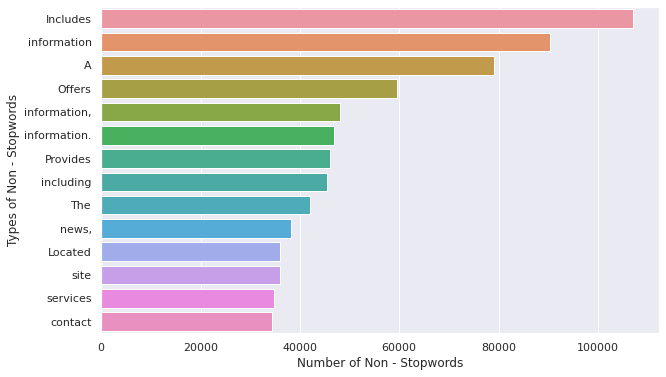

In [30]:
plt.figure(figsize = (10,6))
plot_top_non_stopwords_barchart(data['desc'])

plt.xlabel('Number of Non - Stopwords')
plt.ylabel('Types of Non - Stopwords')
plt.show()

<a id="14"></a>

## 7. *Visualizing Categories Using Pie Chart* :

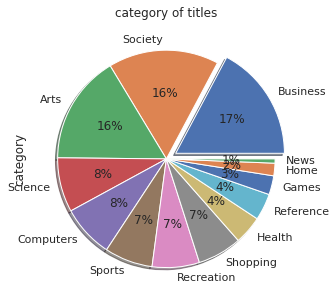

In [31]:
plt.figure(figsize=(15,5))
highlight =(0.1,0,0,0,0,0,0,0,0,0,0,0,0)

data['category'].value_counts().plot(kind='pie', autopct= '%1.0f%%', shadow=True,explode=highlight)
plt.title('category of titles')
plt.show()

<a id="15"></a>

## 8. *Visualizing Categories Using Countplot* :

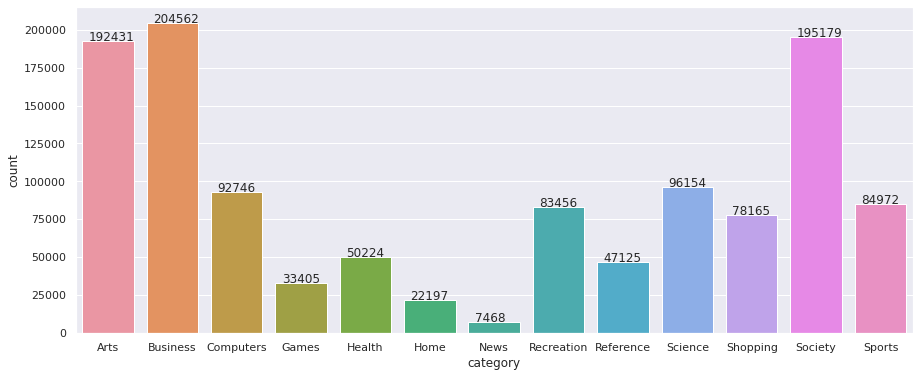

In [32]:
plt.figure( figsize=(15,6))
ax = sns.countplot(x='category', data=data)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

<a id="16"></a>

## 9. *Number of Characters Present in Each Sentence of Description According to the Category*:

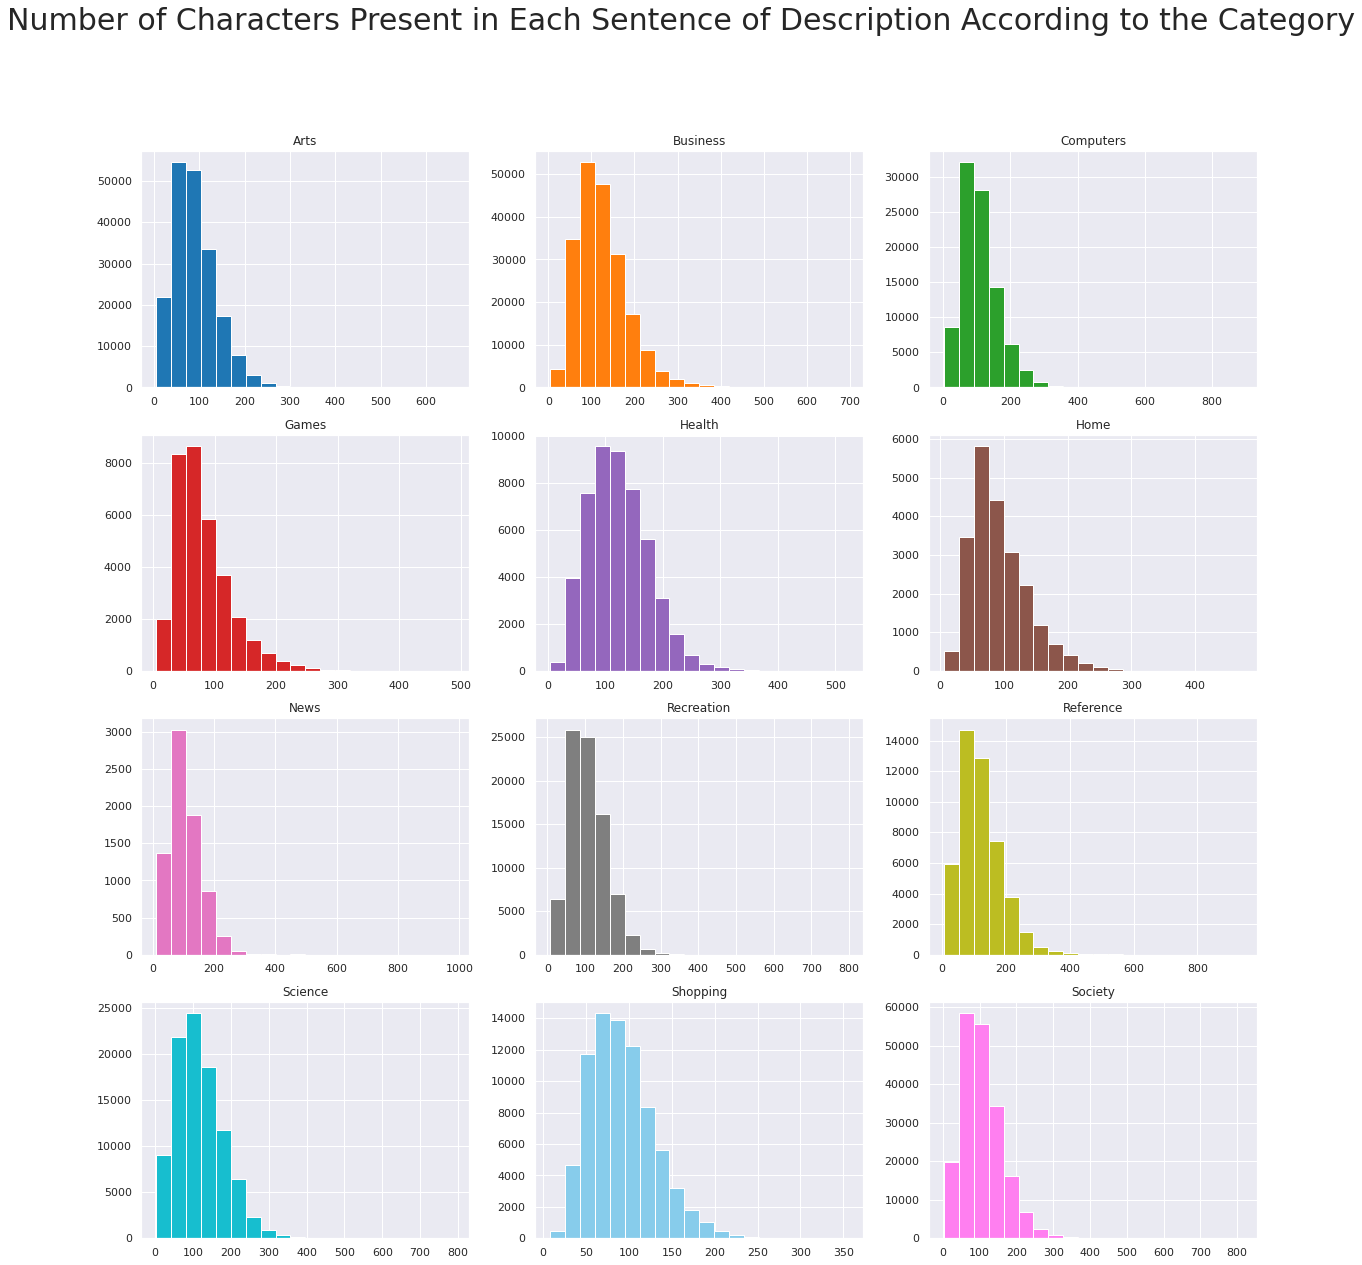

In [33]:
fig,plotcanvas=plt.subplots(4,3,figsize=(20,20))
cols = data.category.unique().tolist()
count = 0
for x in range(4):
    for y in range(3):
        sentlen = data[data['category'] == cols[count]]['desc'].str.len()
        plotcanvas[x, y].hist(sentlen, color = colors[count], bins=20)
        plotcanvas[x, y].set_title(cols[count])
        count +=1

fig.suptitle('Number of Characters Present in Each Sentence of Description According to the Category',fontsize = 30)
plt.show()

<a id="17"></a>
## 10. *Number of Words Appearing in Each Description According To The Category* :

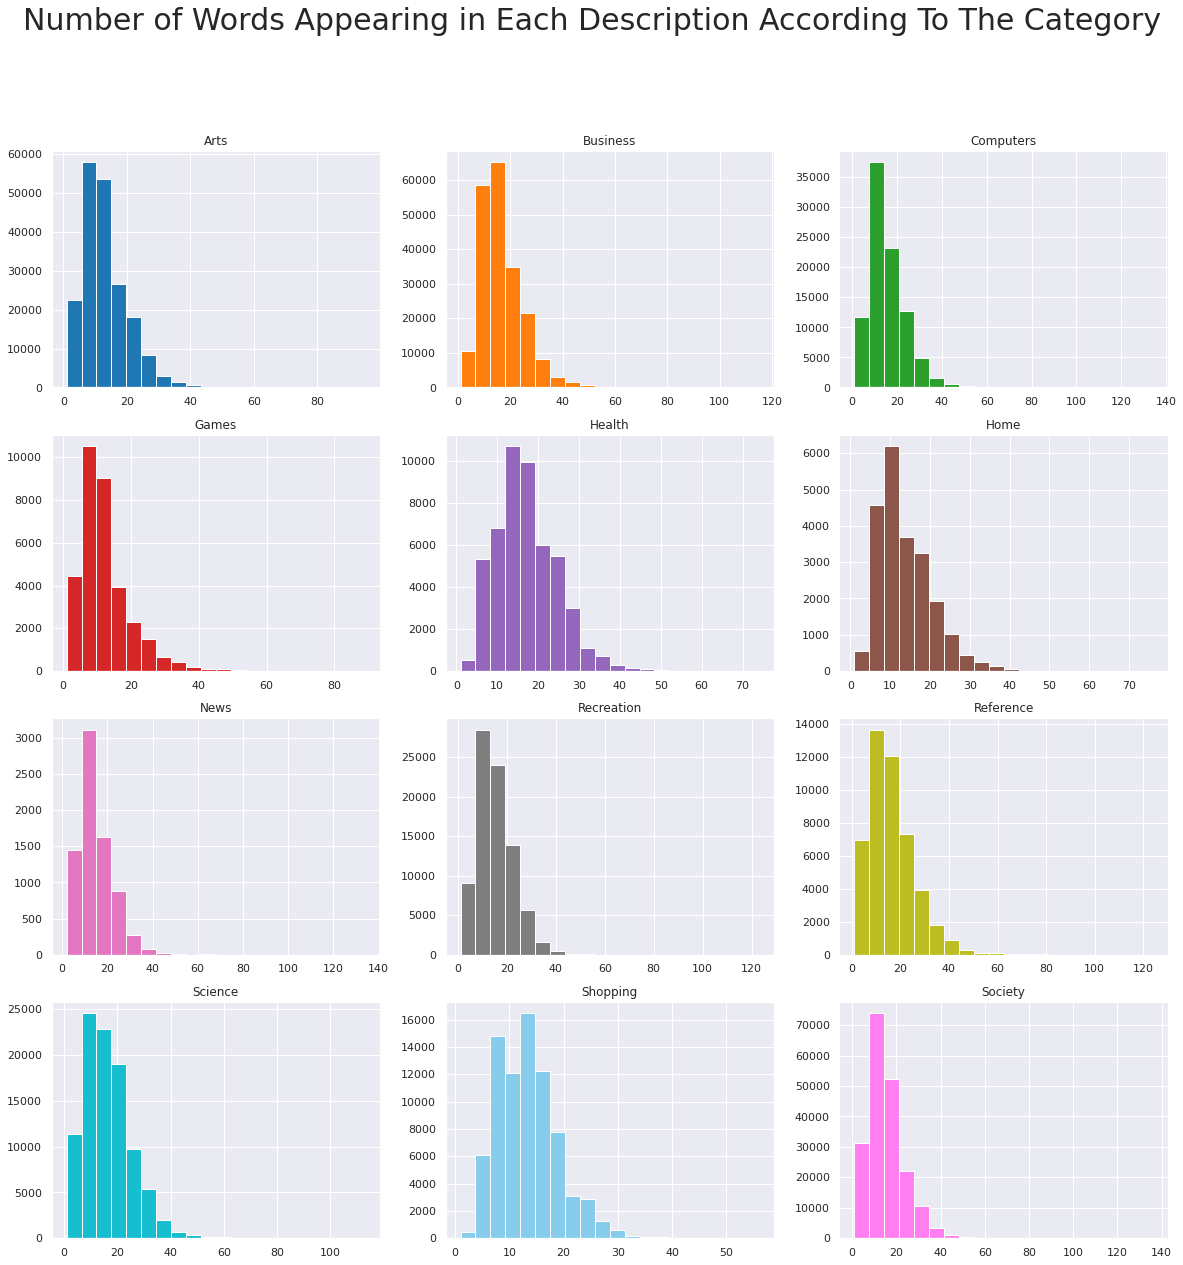

In [34]:
fig,plotcanvas=plt.subplots(4,3,figsize=(20,20))
cols = data.category.unique().tolist()
count = 0
for x in range(4):
    for y in range(3):
        sentlen = data[data['category'] == cols[count]]['desc'].str.split().map(lambda x: len(x))
        plotcanvas[x, y].hist(sentlen, color = colors[count], bins=20)
        plotcanvas[x, y].set_title(cols[count])
        count +=1

fig.suptitle('Number of Words Appearing in Each Description According To The Category', fontsize = 30)
plt.show()

<a id="18"></a>

## 11. *Average Word Length in Each Sentence For Each Category* :

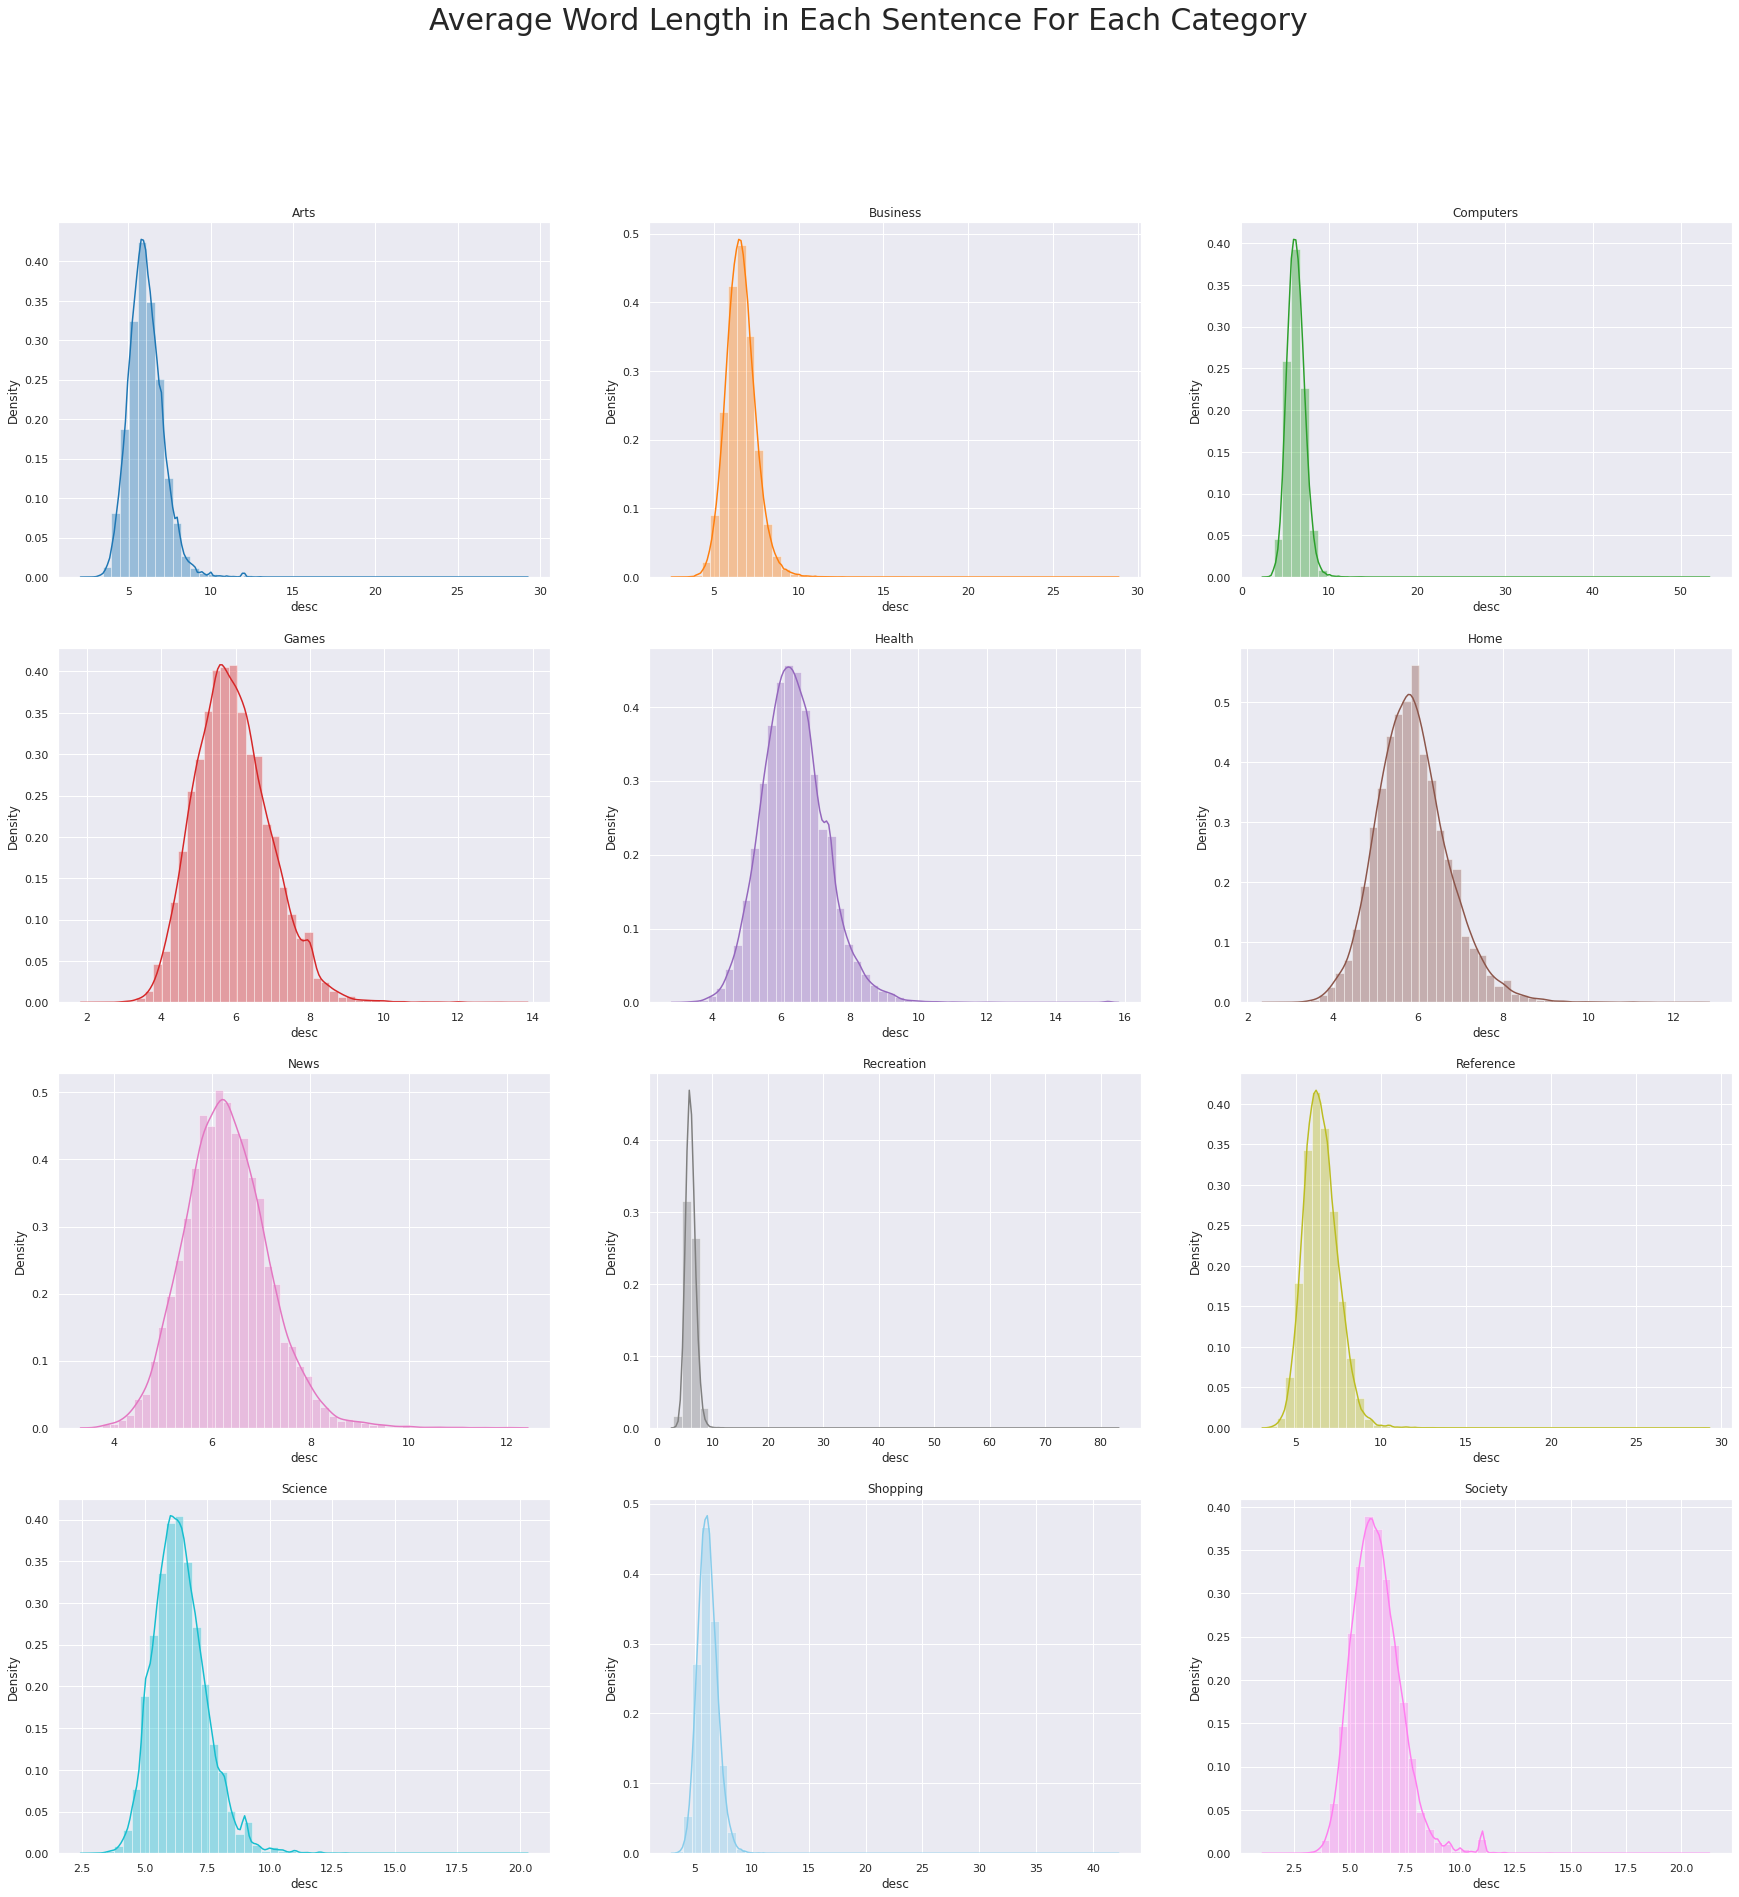

In [35]:
fig,plotcanvas=plt.subplots(4,3,figsize=(30,30))
cols = data.category.unique().tolist()
count = 0
dict1 = {}
for x in range(4):
    for y in range(3):
        word = data[data['category']== cols[count]]['desc'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
        sns.distplot(word,ax= plotcanvas[x, y], color = colors[count])
        plotcanvas[x, y].set_title(cols[count])
        dict1.update({cols[count]:[max(word), min(word), np.mean(word)]})
        count +=1

fig.suptitle('Average Word Length in Each Sentence For Each Category', fontsize=30)
plt.show()

In [36]:
for i,j in dict1.items():
    print(f"Category of {i:10s} has max ={j[0]: >0.3f}\t, min = {j[1]: >0.3f}\t, mean = {j[2]: >0.3f}.")

Category of Arts       has max =29.000	, min = 2.375	, mean = 6.071.
Category of Business   has max =28.667	, min = 2.714	, mean = 6.587.
Category of Computers  has max =53.000	, min = 2.667	, mean = 6.213.
Category of Games      has max =13.500	, min = 2.200	, mean = 5.934.
Category of Health     has max =15.500	, min = 3.143	, mean = 6.385.
Category of Home       has max =12.500	, min = 2.692	, mean = 5.881.
Category of News       has max =12.000	, min = 3.750	, mean = 6.296.
Category of Recreation has max =83.000	, min = 2.857	, mean = 6.050.
Category of Reference  has max =29.000	, min = 3.375	, mean = 6.482.
Category of Science    has max =20.000	, min = 2.750	, mean = 6.415.
Category of Shopping   has max =42.000	, min = 3.182	, mean = 6.098.
Category of Society    has max =21.000	, min = 1.333	, mean = 6.228.


<a id="19"></a>

## 12. *Generating Word Cloud For description* :

In [37]:
from wordcloud import WordCloud

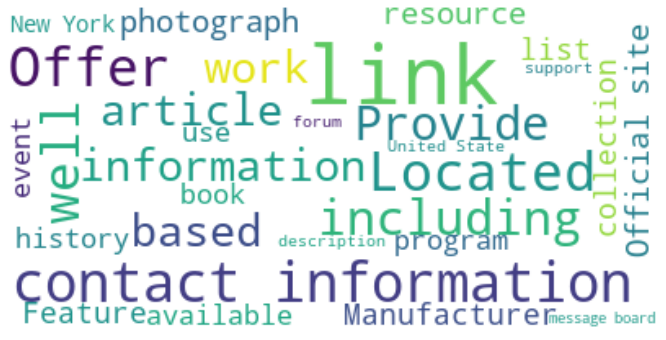

In [38]:
text = " ".join(desc for desc in data["desc"])

wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white").generate(text)
plt.figure(figsize=(14,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<a id="20"></a>

## 13. *Generating Word Cloud For description per category* :

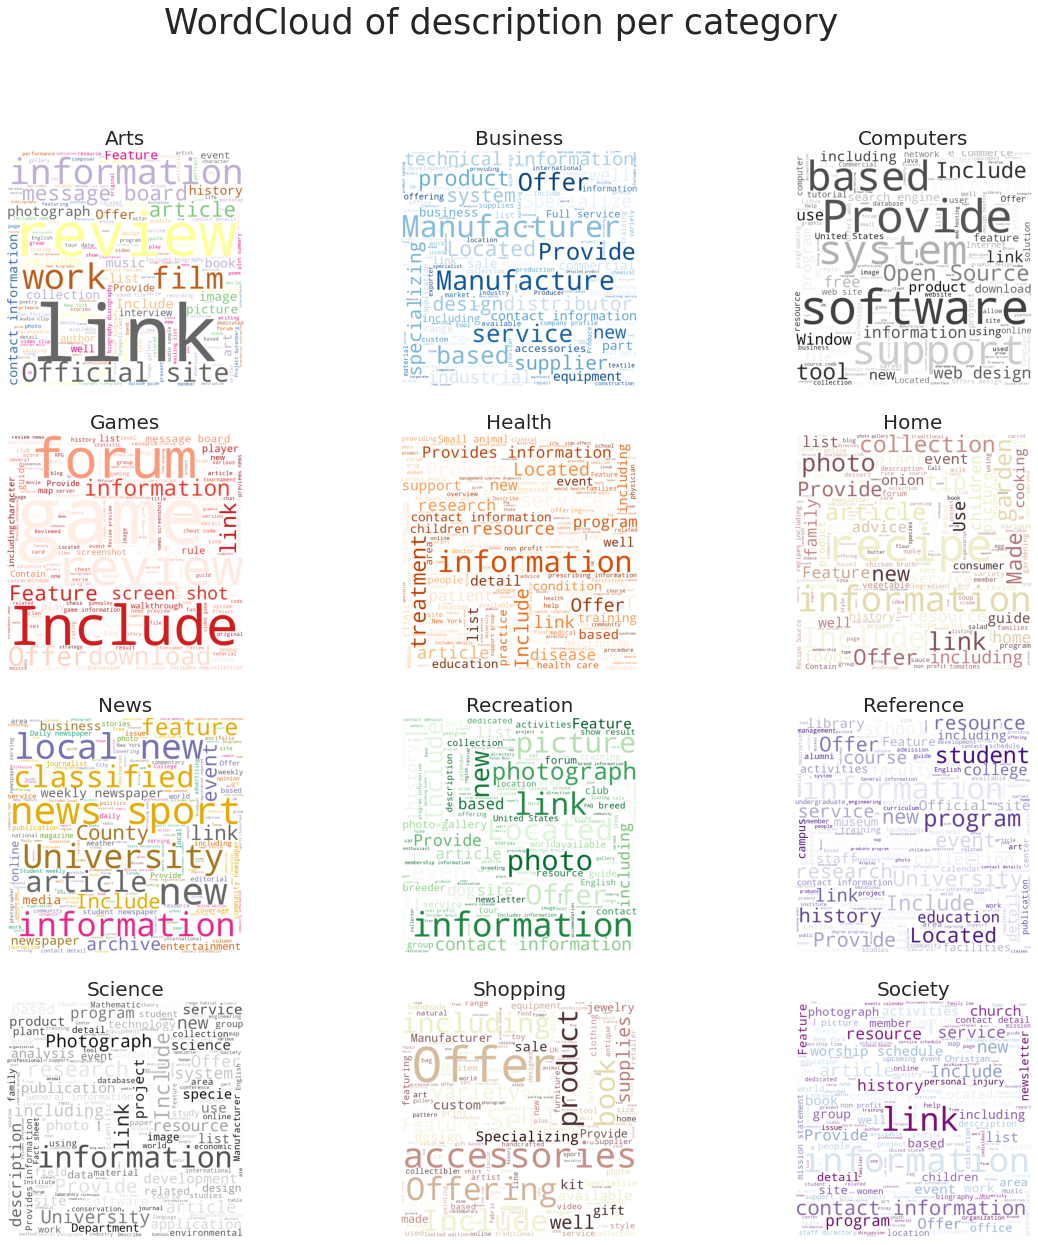

In [39]:
fig,plotcanvas=plt.subplots(4,3,figsize=(20,20))
cols = data.category.unique().tolist()
count = 0
colorr = ['Accent',"Blues",'Greys','Reds','Oranges', 'pink' , 'Dark2', "Greens",'Purples', 'gray', 'pink','BuPu' ]
for x in range(4):
    for y in range(3):
        text = " ".join(desc for desc in data[data['category']== cols[count]]['desc'])
        wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap=colorr[count], 
                min_font_size = 10).generate(text) 
        plotcanvas[x, y].imshow(wordcloud1)
        plotcanvas[x, y].axis('off')
        plotcanvas[x, y].set_title(cols[count], fontsize = 20)
        count +=1
fig.suptitle('WordCloud of description per category', fontsize = 35)
plt.show()

<a id="21"></a>

## 14. *Generating Word Cloud For title* :

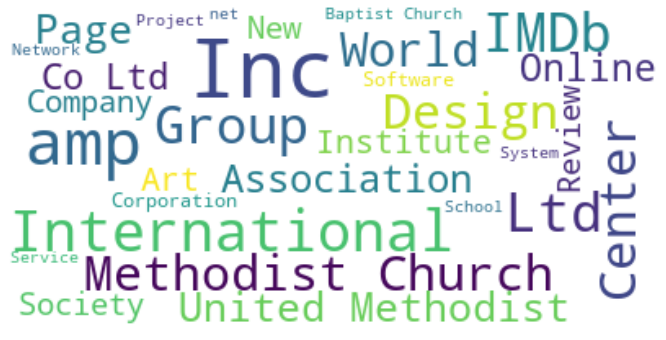

In [40]:
text = " ".join(desc for desc in data["title"])

wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white").generate(text)
plt.figure(figsize=(14,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

___
<a id="22"></a>

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;padding:18px">Text Preprocessing</p>

1. [Lower Casing](#23)
2. [Removal of Punctuations](#24)
3. [Removal of Stopwords](#25)
4. [Removal of Frequent words](#26)
5. [Removal of Rare words](#27)
6. [Removal of Numbers](#28)
7. [Removal of Single Characters](#29)
7. [Removal of White Spaces](#30)
8. [Lemmatization & Tokenization ](#31)
9. [Converting List to String](#32)
10. [Encoding category column ](#33)

<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

In [41]:
df1=data.copy()
df1.shape

(1188084, 5)

<a id="23"></a>

## 1. *Lower Casing* :

In [42]:
df1['desc_Lower'] = df1['desc'].str.lower()
df1['title_Lower'] = df1['title'].str.lower()
df1.head()

category                                              title  \
0     Arts                         About.com: Animation Guide   
1     Arts                                          Toonhound   
2     Arts  Enculturation: From Mouse to Mouse: Overcoming...   
3     Arts         Digital Media FX: The History of Animation   
4     Arts                Spark Online: Only Genius Is Genius   

                                                desc  \
0  Keep up with developments in online animation ...   
1  British cartoon, animation and comic strip cre...   
2  Essay by Patricia Pisters on the animated imag...   
3  Michael Crandol takes an exhaustive look at th...   
4  Chris Romano feels that the proliferation of F...   

   Number of Characters in desc  Number of Characters in title  \
0                           122                             26   
1                            91                              9   
2                           103                             58   
3                           145                             42   
4                           157                             35   

                                          desc_Lower  \
0  keep up with developments in online animation ...   
1  british cartoon, animation and comic strip cre...   
2  essay by patricia pisters on the animated imag...   
3  michael crandol takes an exhaustive look at th...   
4  chris romano feels that the proliferation of f...   

                                         title_Lower  
0                         about.com: animation guide  
1                                          toonhound  
2  enculturation: from mouse to mouse: overcoming...  
3         digital media fx: the history of animation  
4                spark online: only genius is genius

<a id="24"></a>

## 2. *Map Punctuation to space* :

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
df1.drop(['desc'], axis=1, inplace=True)
df1.drop(['title'], axis=1, inplace=True)
PUNCT_TO_REPLACE = string.punctuation
def replace_punctuation(text):
    translator = str.maketrans(PUNCT_TO_REPLACE, ' '*len(PUNCT_TO_REPLACE)) #map punctuation to space
    return text.translate(translator)

df1['desc_Removal_punctuations'] = df1['desc_Lower'].apply(lambda text: replace_punctuation(text))
df1['title_Removal_punctuations'] = df1['title_Lower'].apply(lambda text: replace_punctuation(text))
df1.head()

category  Number of Characters in desc  Number of Characters in title  \
0     Arts                           122                             26   
1     Arts                            91                              9   
2     Arts                           103                             58   
3     Arts                           145                             42   
4     Arts                           157                             35   

                                          desc_Lower  \
0  keep up with developments in online animation ...   
1  british cartoon, animation and comic strip cre...   
2  essay by patricia pisters on the animated imag...   
3  michael crandol takes an exhaustive look at th...   
4  chris romano feels that the proliferation of f...   

                                         title_Lower  \
0                         about.com: animation guide   
1                                          toonhound   
2  enculturation: from mouse to mouse: overcoming...   
3         digital media fx: the history of animation   
4                spark online: only genius is genius   

                           desc_Removal_punctuations  \
0  keep up with developments in online animation ...   
1  british cartoon  animation and comic strip cre...   
2  essay by patricia pisters on the animated imag...   
3  michael crandol takes an exhaustive look at th...   
4  chris romano feels that the proliferation of f...   

                          title_Removal_punctuations  
0                         about com  animation guide  
1                                          toonhound  
2  enculturation  from mouse to mouse  overcoming...  
3         digital media fx  the history of animation  
4                spark online  only genius is genius

<a id="25"></a>

## 3. *Removal of Stopwords* :

In [45]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [46]:
df1.drop(['desc_Lower'], axis=1, inplace=True)
df1.drop(['title_Lower'], axis=1, inplace=True)

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df1['desc_Removal_stopwords'] = df1['desc_Removal_punctuations'].apply(lambda text:  remove_stopwords(text))
df1['title_Removal_stopwords'] = df1['title_Removal_punctuations'].apply(lambda text:  remove_stopwords(text))

df1.head()

category  Number of Characters in desc  Number of Characters in title  \
0     Arts                           122                             26   
1     Arts                            91                              9   
2     Arts                           103                             58   
3     Arts                           145                             42   
4     Arts                           157                             35   

                           desc_Removal_punctuations  \
0  keep up with developments in online animation ...   
1  british cartoon  animation and comic strip cre...   
2  essay by patricia pisters on the animated imag...   
3  michael crandol takes an exhaustive look at th...   
4  chris romano feels that the proliferation of f...   

                          title_Removal_punctuations  \
0                         about com  animation guide   
1                                          toonhound   
2  enculturation  from mouse to mouse  overcoming...   
3         digital media fx  the history of animation   
4                spark online  only genius is genius   

                              desc_Removal_stopwords  \
0  keep developments online animation skill level...   
1  british cartoon animation comic strip creation...   
2  essay patricia pisters animated image changing...   
3  michael crandol takes exhaustive look history ...   
4  chris romano feels proliferation flash web bas...   

                            title_Removal_stopwords  
0                               com animation guide  
1                                         toonhound  
2  enculturation mouse mouse overcoming information  
3                digital media fx history animation  
4                        spark online genius genius

<a id="26"></a>

## 4. *Removal of Frequent words* :

In [47]:
#Removal of Frequent words
from collections import Counter
cols = df1.category.unique().tolist()
bigCnt = {}
maxN = 0
for cat in cols:
    cnt = {}
    df11 = df1.query("category == @cat")
    cnt = Counter()
    for text in df11['desc_Removal_stopwords'].values:
        for word in text.split():
            cnt[word] += 1
    bigCnt.update({cat:cnt.most_common()})
    if  cnt.most_common()[0][1] > maxN:
         maxN = cnt.most_common()[0][1]

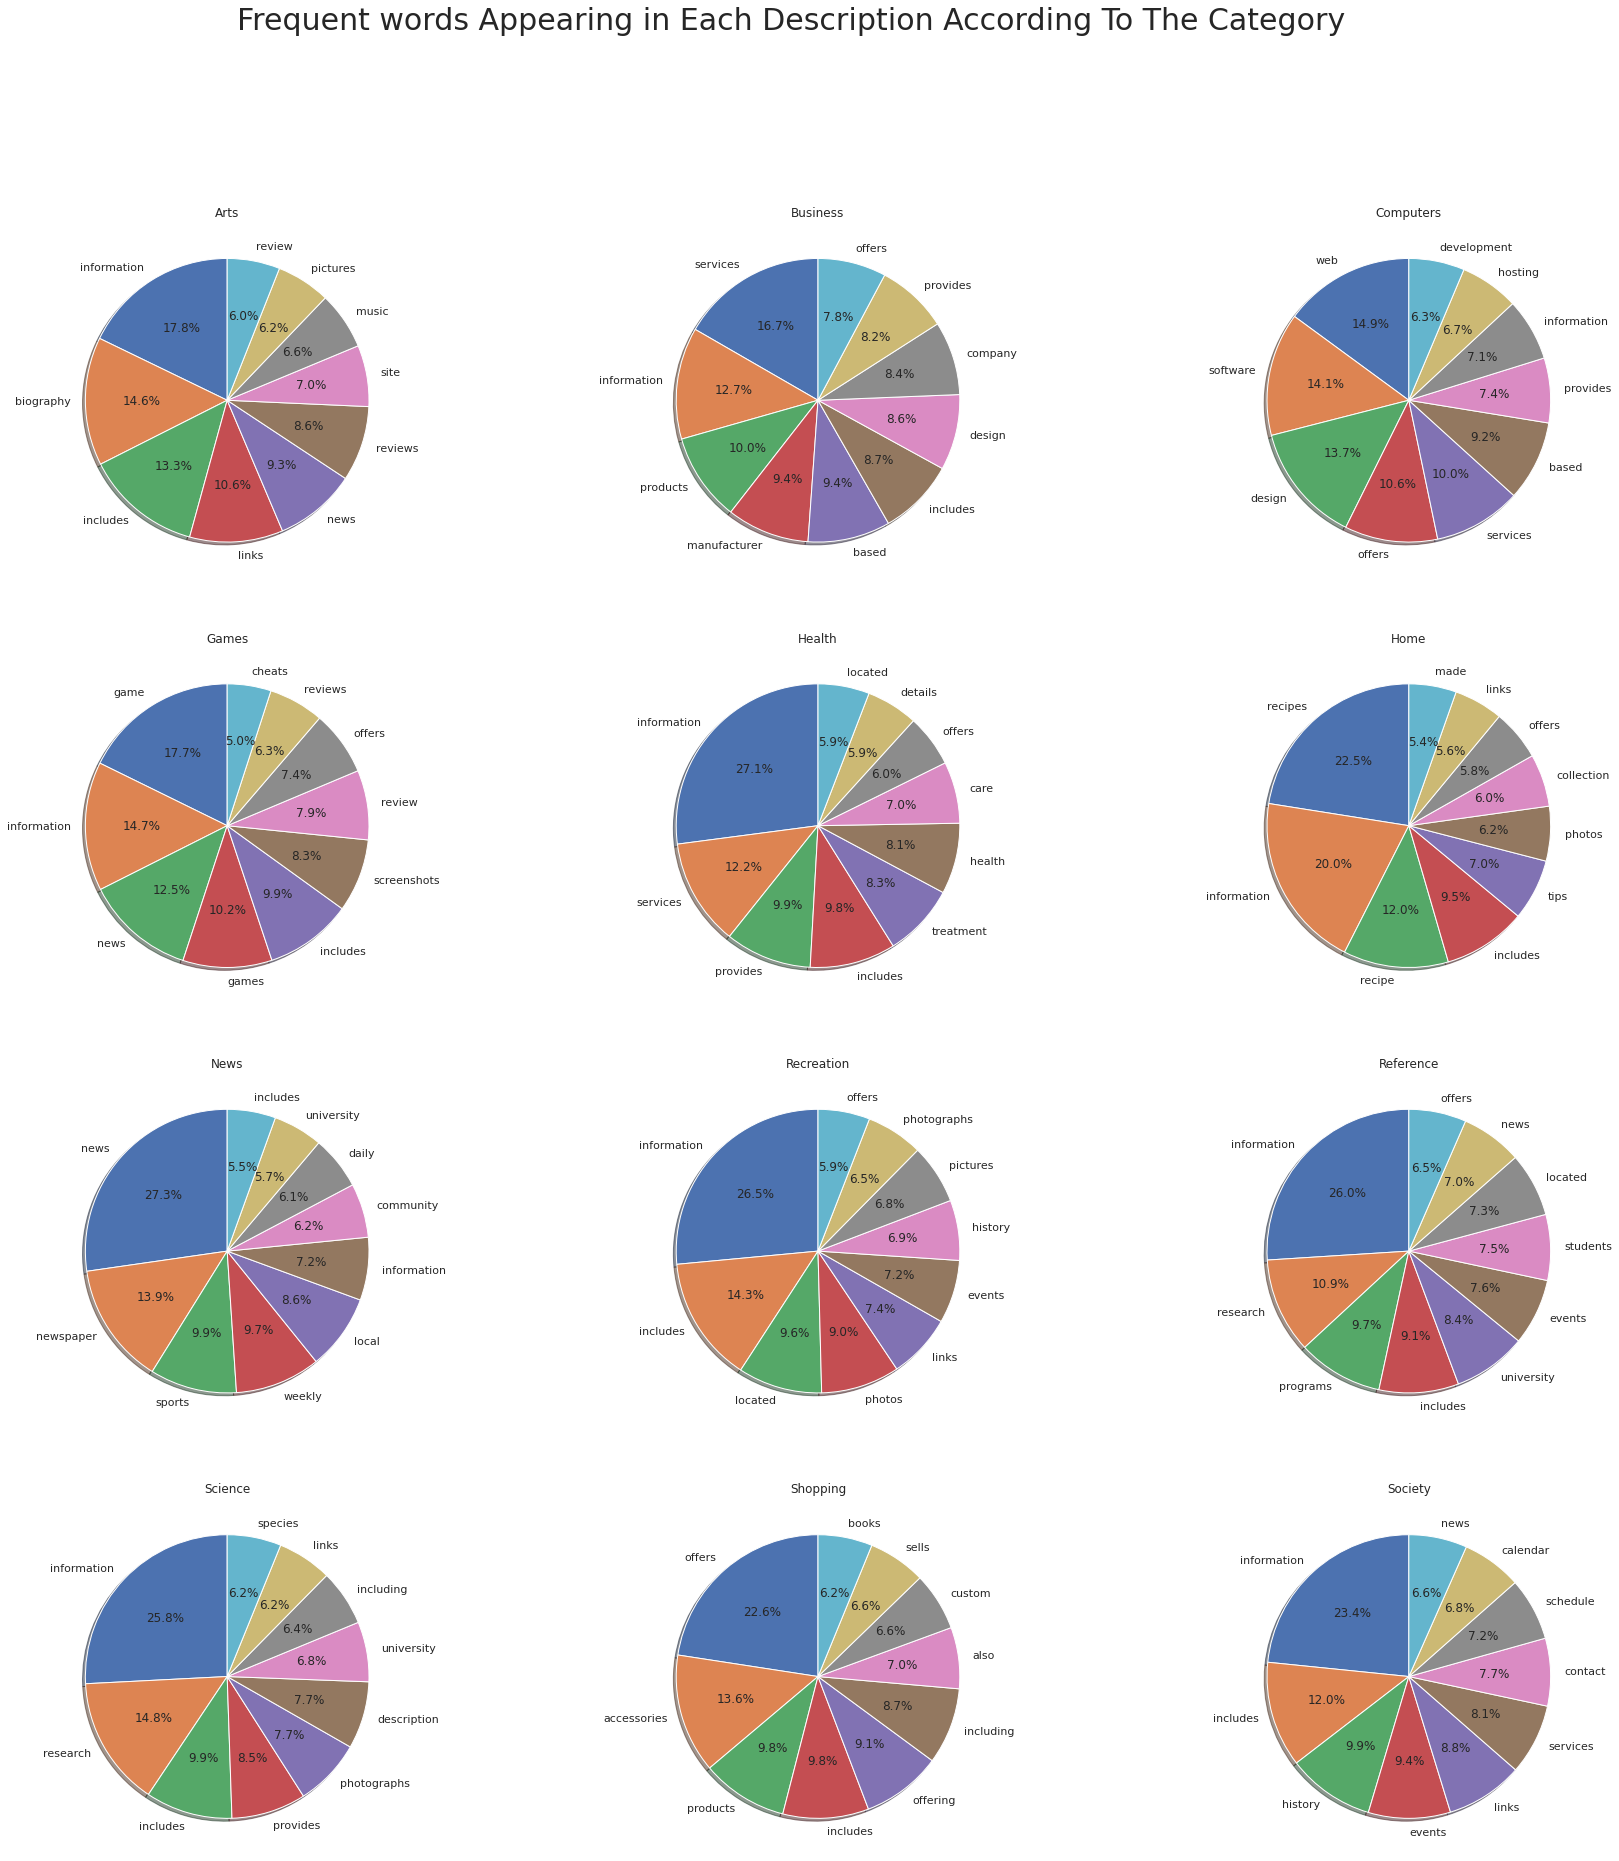

In [48]:
fig,plotcanvas=plt.subplots(4,3,figsize=(30,30))
cols = df1.category.unique().tolist()
count = 0
for x in range(4):
    for y in range(3):
        k,v = zip(*bigCnt[cols[count]][:10])
        plotcanvas[x, y].pie([m/maxN for m in v],labels=k, autopct='%1.1f%%',shadow=True, startangle=90)
        plotcanvas[x, y].set_title(cols[count])
        count +=1
fig.suptitle('Frequent words Appearing in Each Description According To The Category', fontsize = 30)
plt.show()

In [49]:
dicCnt = {}
for cat, tup in bigCnt.items():
    wordList = []
    for word in tup:
        if len(wordList)>30:
            continue
        wordList.append(word[0])
    dicCnt.update({cat:wordList})

In [50]:
freqWord = []
for cat, freq in dicCnt.items():
    dicCat = dicCnt.copy()
    dicCat.pop(cat)
    templist1 = []
    for templist2 in dicCat.values():
        templist1.extend(templist2)
    for word in freq:
        if word in templist1:
            freqWord.append(word)

In [51]:
def removeFreq(text):
    """custom function to clean text"""
    text = " ".join([word for word in str(text).split() if word not in freqWord]) #Remove stopwords
    return text

In [52]:
df1["desc_Removal_Frequentwords"] = df1['desc_Removal_stopwords'].apply(lambda text: removeFreq(text))

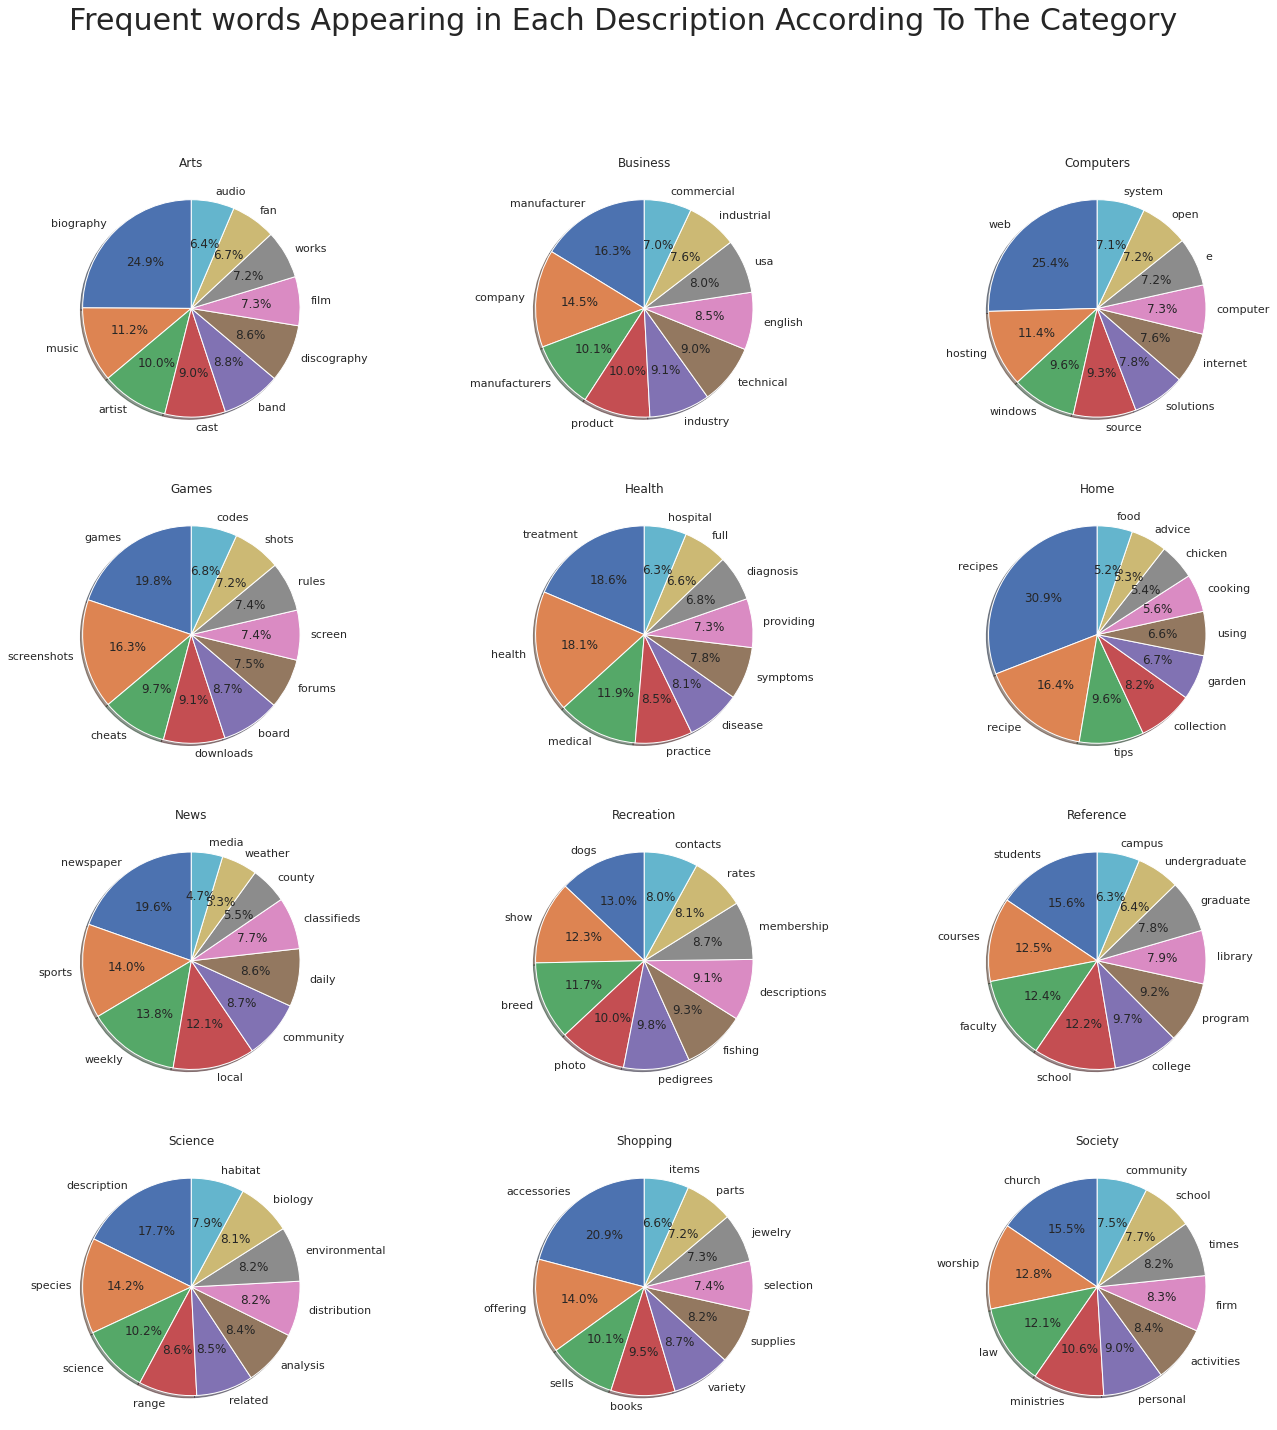

In [53]:
#Removal of Frequent words
from collections import Counter
df1=df1.copy()
cols = df1.category.unique().tolist()
bigCnt = {}
maxN = 0
for cat in cols:
    cnt = {}
    df11 = df1.query("category == @cat")
    cnt = Counter()
    for text in df11['desc_Removal_Frequentwords'].values:
        for word in text.split():
            cnt[word] += 1
    bigCnt.update({cat:cnt.most_common()})
    if  cnt.most_common()[0][1] > maxN:
         maxN = cnt.most_common()[0][1]
            
fig,plotcanvas=plt.subplots(4,3,figsize=(23,23))
cols = df1.category.unique().tolist()
count = 0
for x in range(4):
    for y in range(3):
        k,v = zip(*bigCnt[cols[count]][:10])
        plotcanvas[x, y].pie([m/maxN for m in v],labels=k, autopct='%1.1f%%',shadow=True, startangle=90)
        plotcanvas[x, y].set_title(cols[count])
        count +=1
fig.suptitle('Frequent words Appearing in Each Description According To The Category', fontsize = 30)
plt.show()

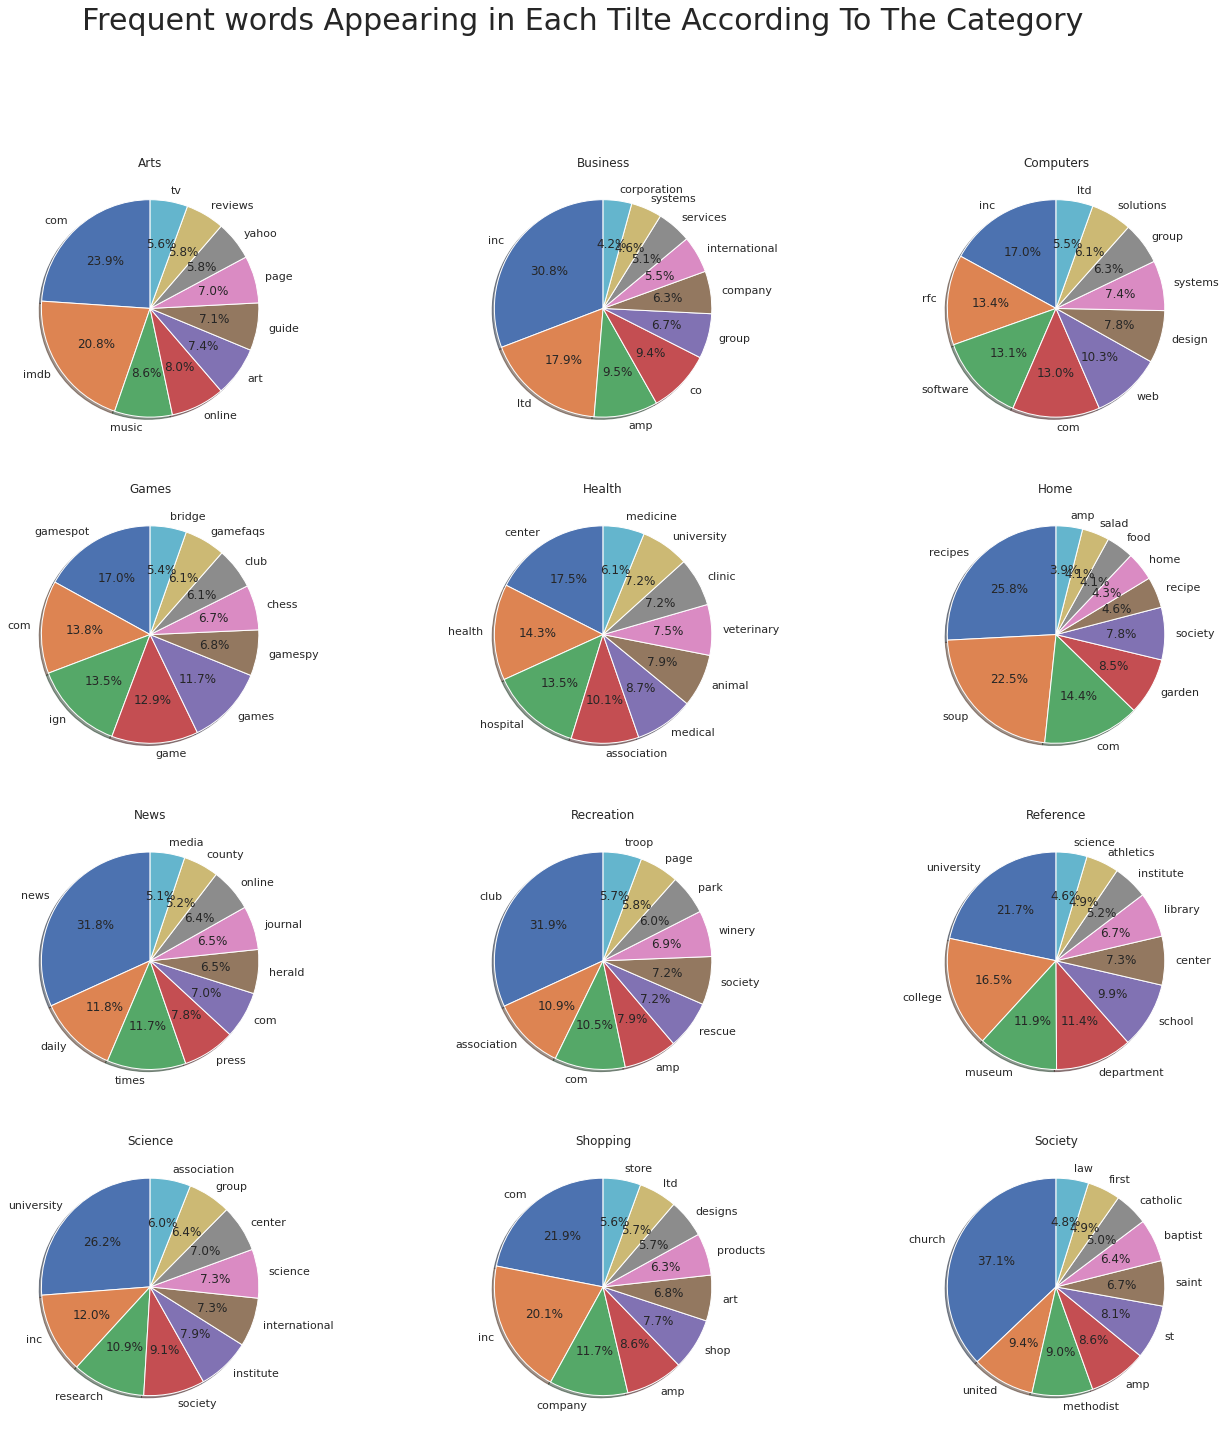

In [54]:
#Removal of Frequent words
from collections import Counter
df1=df1.copy()
cols = df1.category.unique().tolist()
bigCnt = {}
maxN = 0
for cat in cols:
    cnt = {}
    df11 = df1.query("category == @cat")
    cnt = Counter()
    for text in df11['title_Removal_stopwords'].values:
        for word in text.split():
            cnt[word] += 1
    bigCnt.update({cat:cnt.most_common()})
    if  cnt.most_common()[0][1] > maxN:
         maxN = cnt.most_common()[0][1]

fig,plotcanvas=plt.subplots(4,3,figsize=(23,23))
cols = df1.category.unique().tolist()
count = 0
for x in range(4):
    for y in range(3):
        k,v = zip(*bigCnt[cols[count]][:10])
        plotcanvas[x, y].pie([m/maxN for m in v],labels=k, autopct='%1.1f%%',shadow=True, startangle=90)
        plotcanvas[x, y].set_title(cols[count])
        count +=1
fig.suptitle('Frequent words Appearing in Each Tilte According To The Category', fontsize = 30)
plt.show()

In [55]:
dicCnt = {}
for cat, tup in bigCnt.items():
    wordList = []
    for word in tup:
        if len(wordList)>30:
            continue
        wordList.append(word[0])
    dicCnt.update({cat:wordList})
freqWord = []
for cat, freq in dicCnt.items():
    dicCat = dicCnt.copy()
    dicCat.pop(cat)
    templist1 = []
    for templist2 in dicCat.values():
        templist1.extend(templist2)
    for word in freq:
        if word in templist1:
            freqWord.append(word)

In [56]:
df1["title_Removal_Frequentwords"] = df1['title_Removal_stopwords'].apply(lambda text: removeFreq(text))

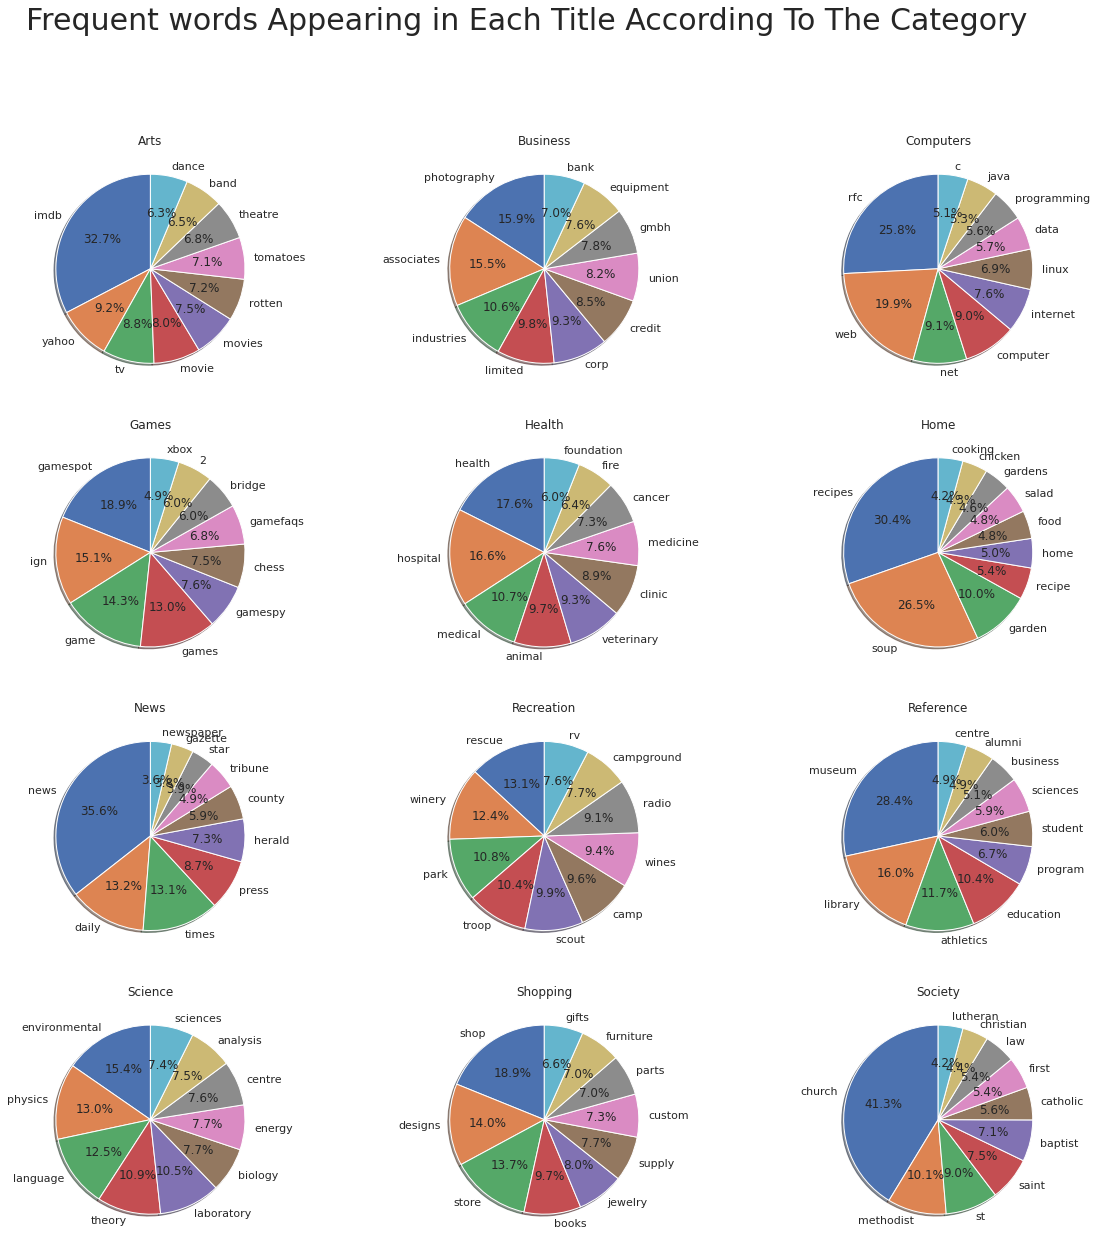

In [57]:
#Removal of Frequent words
from collections import Counter
df1=df1.copy()
cols = df1.category.unique().tolist()
bigCnt = {}
maxN = 0
for cat in cols:
    cnt = {}
    df11 = df1.query("category == @cat")
    cnt = Counter()
    for text in df11['title_Removal_Frequentwords'].values:
        for word in text.split():
            cnt[word] += 1
    bigCnt.update({cat:cnt.most_common()})
    if  cnt.most_common()[0][1] > maxN:
         maxN = cnt.most_common()[0][1]
            
fig,plotcanvas=plt.subplots(4,3,figsize=(20,20))
cols = df1.category.unique().tolist()
count = 0
for x in range(4):
    for y in range(3):
        k,v = zip(*bigCnt[cols[count]][:10])
        plotcanvas[x, y].pie([m/maxN for m in v],labels=k, autopct='%1.1f%%',shadow=True, startangle=90)
        plotcanvas[x, y].set_title(cols[count])
        count +=1
fig.suptitle('Frequent words Appearing in Each Title According To The Category', fontsize = 30)
plt.show()

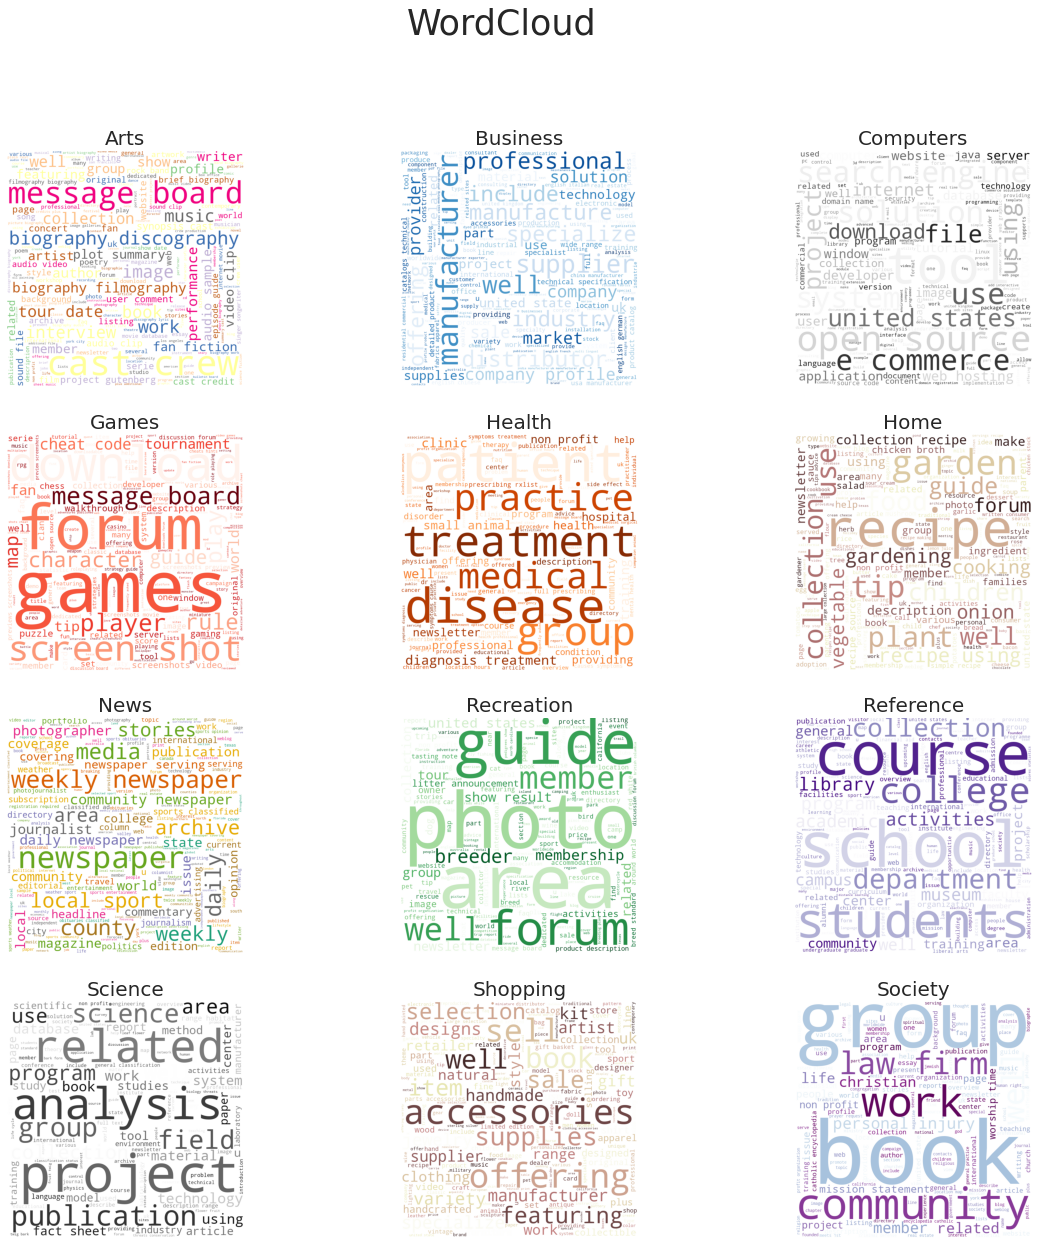

In [58]:
fig,plotcanvas=plt.subplots(4,3,figsize=(20,20))
count = 0
colorr = ['Accent',"Blues",'Greys','Reds','Oranges', 'pink' , 'Dark2', "Greens",'Purples', 'gray', 'pink','BuPu' ]
for x in range(4):
    for y in range(3):
        text = " ".join(desc for desc in df1[df1['category']== cols[count]]['desc_Removal_Frequentwords'])
        wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap=colorr[count], 
                min_font_size = 10).generate(text) 
        plotcanvas[x, y].imshow(wordcloud1)
        plotcanvas[x, y].axis('off')
        plotcanvas[x, y].set_title(cols[count], fontsize = 20)
        count +=1
fig.suptitle('WordCloud', fontsize = 35)
plt.show()

In [59]:
df1.head()

category  Number of Characters in desc  Number of Characters in title  \
0     Arts                           122                             26   
1     Arts                            91                              9   
2     Arts                           103                             58   
3     Arts                           145                             42   
4     Arts                           157                             35   

                           desc_Removal_punctuations  \
0  keep up with developments in online animation ...   
1  british cartoon  animation and comic strip cre...   
2  essay by patricia pisters on the animated imag...   
3  michael crandol takes an exhaustive look at th...   
4  chris romano feels that the proliferation of f...   

                          title_Removal_punctuations  \
0                         about com  animation guide   
1                                          toonhound   
2  enculturation  from mouse to mouse  overcoming...   
3         digital media fx  the history of animation   
4                spark online  only genius is genius   

                              desc_Removal_stopwords  \
0  keep developments online animation skill level...   
1  british cartoon animation comic strip creation...   
2  essay patricia pisters animated image changing...   
3  michael crandol takes exhaustive look history ...   
4  chris romano feels proliferation flash web bas...   

                            title_Removal_stopwords  \
0                               com animation guide   
1                                         toonhound   
2  enculturation mouse mouse overcoming information   
3                digital media fx history animation   
4                        spark online genius genius   

                          desc_Removal_Frequentwords  \
0  keep developments animation skill levels downl...   
1  british cartoon animation comic strip creation...   
2  essay patricia pisters animated image changing...   
3  michael crandol takes exhaustive look animatio...   
4  chris romano feels proliferation flash web ani...   

            title_Removal_Frequentwords  
0                             animation  
1                             toonhound  
2  enculturation mouse mouse overcoming  
3          digital fx history animation  
4                   spark genius genius

<a id="27"></a>

## 5. *Removal of Rare words* :

In [60]:
from collections import Counter
df1.drop(['desc_Removal_stopwords','title_Removal_stopwords'], axis=1, inplace=True)
cnt = Counter()
for text in df1['desc_Removal_Frequentwords'].values:
    for word in text.split():
        cnt[word] += 1
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text,rare):
    return " ".join([word for word in str(text).split() if word not in rare])

df1['desc_Removal_Rarewords'] = df1['desc_Removal_Frequentwords'].apply(lambda text: remove_rarewords(text,RAREWORDS))
cnt2 = Counter()
for text in df1['title_Removal_Frequentwords'].values:
    for word in text.split():
        cnt2[word] += 1
RAREWORDS2 = set([w for (w, wc) in cnt2.most_common()[:-n_rare_words-1:-1]])
df1['title_Removal_Rarewords'] = df1['title_Removal_Frequentwords'].apply(lambda text: remove_rarewords(text,RAREWORDS2))
df1.head(4)

category  Number of Characters in desc  Number of Characters in title  \
0     Arts                           122                             26   
1     Arts                            91                              9   
2     Arts                           103                             58   
3     Arts                           145                             42   

                           desc_Removal_punctuations  \
0  keep up with developments in online animation ...   
1  british cartoon  animation and comic strip cre...   
2  essay by patricia pisters on the animated imag...   
3  michael crandol takes an exhaustive look at th...   

                          title_Removal_punctuations  \
0                         about com  animation guide   
1                                          toonhound   
2  enculturation  from mouse to mouse  overcoming...   
3         digital media fx  the history of animation   

                          desc_Removal_Frequentwords  \
0  keep developments animation skill levels downl...   
1  british cartoon animation comic strip creation...   
2  essay patricia pisters animated image changing...   
3  michael crandol takes exhaustive look animatio...   

            title_Removal_Frequentwords  \
0                             animation   
1                             toonhound   
2  enculturation mouse mouse overcoming   
3          digital fx history animation   

                              desc_Removal_Rarewords  \
0  keep developments animation skill levels downl...   
1  british cartoon animation comic strip creation...   
2  essay patricia pisters animated image changing...   
3  michael crandol takes exhaustive look animatio...   

                title_Removal_Rarewords  
0                             animation  
1                             toonhound  
2  enculturation mouse mouse overcoming  
3          digital fx history animation

<a id="28"></a>

## 6. *Removal of Numbers* :

In [61]:
df1.drop(['desc_Removal_Frequentwords','title_Removal_Frequentwords'], axis=1, inplace=True)

def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

df1['desc_Removal_Numbers'] = df1['desc_Removal_Rarewords'].apply(lambda text: remove_numbers(text))
df1['title_Removal_Numbers'] = df1['title_Removal_Rarewords'].apply(lambda text: remove_numbers(text))
df1.head()

category  Number of Characters in desc  Number of Characters in title  \
0     Arts                           122                             26   
1     Arts                            91                              9   
2     Arts                           103                             58   
3     Arts                           145                             42   
4     Arts                           157                             35   

                           desc_Removal_punctuations  \
0  keep up with developments in online animation ...   
1  british cartoon  animation and comic strip cre...   
2  essay by patricia pisters on the animated imag...   
3  michael crandol takes an exhaustive look at th...   
4  chris romano feels that the proliferation of f...   

                          title_Removal_punctuations  \
0                         about com  animation guide   
1                                          toonhound   
2  enculturation  from mouse to mouse  overcoming...   
3         digital media fx  the history of animation   
4                spark online  only genius is genius   

                              desc_Removal_Rarewords  \
0  keep developments animation skill levels downl...   
1  british cartoon animation comic strip creation...   
2  essay patricia pisters animated image changing...   
3  michael crandol takes exhaustive look animatio...   
4  chris romano feels proliferation flash web ani...   

                title_Removal_Rarewords  \
0                             animation   
1                             toonhound   
2  enculturation mouse mouse overcoming   
3          digital fx history animation   
4                   spark genius genius   

                                desc_Removal_Numbers  \
0  keep developments animation skill levels downl...   
1  british cartoon animation comic strip creation...   
2  essay patricia pisters animated image changing...   
3  michael crandol takes exhaustive look animatio...   
4  chris romano feels proliferation flash web ani...   

                  title_Removal_Numbers  
0                             animation  
1                             toonhound  
2  enculturation mouse mouse overcoming  
3          digital fx history animation  
4                   spark genius genius

<a id="29"></a>

## 7. *Removal of Single Characters* :

In [62]:
df1.drop(['desc_Removal_Numbers','title_Removal_Numbers'], axis=1, inplace=True)

def remove_single_char(text):
    
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

df1['desc_Removal_single_Characters'] = df1['desc_Removal_Rarewords'].apply(lambda text: remove_single_char(text))
df1['title_Removal_single_Characters'] = df1['title_Removal_Rarewords'].apply(lambda text: remove_single_char(text))
df1.head()

category  Number of Characters in desc  Number of Characters in title  \
0     Arts                           122                             26   
1     Arts                            91                              9   
2     Arts                           103                             58   
3     Arts                           145                             42   
4     Arts                           157                             35   

                           desc_Removal_punctuations  \
0  keep up with developments in online animation ...   
1  british cartoon  animation and comic strip cre...   
2  essay by patricia pisters on the animated imag...   
3  michael crandol takes an exhaustive look at th...   
4  chris romano feels that the proliferation of f...   

                          title_Removal_punctuations  \
0                         about com  animation guide   
1                                          toonhound   
2  enculturation  from mouse to mouse  overcoming...   
3         digital media fx  the history of animation   
4                spark online  only genius is genius   

                              desc_Removal_Rarewords  \
0  keep developments animation skill levels downl...   
1  british cartoon animation comic strip creation...   
2  essay patricia pisters animated image changing...   
3  michael crandol takes exhaustive look animatio...   
4  chris romano feels proliferation flash web ani...   

                title_Removal_Rarewords  \
0                             animation   
1                             toonhound   
2  enculturation mouse mouse overcoming   
3          digital fx history animation   
4                   spark genius genius   

                      desc_Removal_single_Characters  \
0  keep developments animation skill levels downl...   
1  british cartoon animation comic strip creation...   
2  essay patricia pisters animated image changing...   
3  michael crandol takes exhaustive look animatio...   
4  chris romano feels proliferation flash web ani...   

        title_Removal_single_Characters  
0                             animation  
1                             toonhound  
2  enculturation mouse mouse overcoming  
3          digital fx history animation  
4                   spark genius genius

<a id="30"></a>

## 8. *Removal of White Spaces* :

In [63]:
df1.drop(['desc_Removal_Rarewords','title_Removal_Rarewords'], axis=1, inplace=True)

def remove_whitespace(text):
    return  " ".join(text.split())

df1['desc_Removal_Whitespaces']=df1['desc_Removal_single_Characters'].apply(remove_whitespace)
df1['title_Removal_Whitespaces']=df1['title_Removal_single_Characters'].apply(remove_whitespace)
df1.head()

category  Number of Characters in desc  Number of Characters in title  \
0     Arts                           122                             26   
1     Arts                            91                              9   
2     Arts                           103                             58   
3     Arts                           145                             42   
4     Arts                           157                             35   

                           desc_Removal_punctuations  \
0  keep up with developments in online animation ...   
1  british cartoon  animation and comic strip cre...   
2  essay by patricia pisters on the animated imag...   
3  michael crandol takes an exhaustive look at th...   
4  chris romano feels that the proliferation of f...   

                          title_Removal_punctuations  \
0                         about com  animation guide   
1                                          toonhound   
2  enculturation  from mouse to mouse  overcoming...   
3         digital media fx  the history of animation   
4                spark online  only genius is genius   

                      desc_Removal_single_Characters  \
0  keep developments animation skill levels downl...   
1  british cartoon animation comic strip creation...   
2  essay patricia pisters animated image changing...   
3  michael crandol takes exhaustive look animatio...   
4  chris romano feels proliferation flash web ani...   

        title_Removal_single_Characters  \
0                             animation   
1                             toonhound   
2  enculturation mouse mouse overcoming   
3          digital fx history animation   
4                   spark genius genius   

                            desc_Removal_Whitespaces  \
0  keep developments animation skill levels downl...   
1  british cartoon animation comic strip creation...   
2  essay patricia pisters animated image changing...   
3  michael crandol takes exhaustive look animatio...   
4  chris romano feels proliferation flash web ani...   

              title_Removal_Whitespaces  
0                             animation  
1                             toonhound  
2  enculturation mouse mouse overcoming  
3          digital fx history animation  
4                   spark genius genius

<a id="31"></a>

## 9. *lemmitization & Tokenization* :

In [64]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [65]:
df1.drop(['desc_Removal_Whitespaces','title_Removal_Whitespaces'], axis=1, inplace=True)
lemmatizer = WordNetLemmatizer()
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word, pos ='n') for word in word_tokens]
    return lemmas

df1['desc_Lemmatized'] = df1['desc_Removal_single_Characters'].apply(lambda text: lemmatize_word(text))
lemmatizer = WordNetLemmatizer()
df1['title_Lemmatized'] = df1['title_Removal_single_Characters'].apply(lambda text: lemmatize_word(text))
df1.head()

category  Number of Characters in desc  Number of Characters in title  \
0     Arts                           122                             26   
1     Arts                            91                              9   
2     Arts                           103                             58   
3     Arts                           145                             42   
4     Arts                           157                             35   

                           desc_Removal_punctuations  \
0  keep up with developments in online animation ...   
1  british cartoon  animation and comic strip cre...   
2  essay by patricia pisters on the animated imag...   
3  michael crandol takes an exhaustive look at th...   
4  chris romano feels that the proliferation of f...   

                          title_Removal_punctuations  \
0                         about com  animation guide   
1                                          toonhound   
2  enculturation  from mouse to mouse  overcoming...   
3         digital media fx  the history of animation   
4                spark online  only genius is genius   

                      desc_Removal_single_Characters  \
0  keep developments animation skill levels downl...   
1  british cartoon animation comic strip creation...   
2  essay patricia pisters animated image changing...   
3  michael crandol takes exhaustive look animatio...   
4  chris romano feels proliferation flash web ani...   

        title_Removal_single_Characters  \
0                             animation   
1                             toonhound   
2  enculturation mouse mouse overcoming   
3          digital fx history animation   
4                   spark genius genius   

                                     desc_Lemmatized  \
0  [keep, development, animation, skill, level, d...   
1  [british, cartoon, animation, comic, strip, cr...   
2  [essay, patricia, pisters, animated, image, ch...   
3  [michael, crandol, take, exhaustive, look, ani...   
4  [chris, romano, feel, proliferation, flash, we...   

                            title_Lemmatized  
0                                [animation]  
1                                [toonhound]  
2  [enculturation, mouse, mouse, overcoming]  
3          [digital, fx, history, animation]  
4                    [spark, genius, genius]

<a id="32"></a>

## 10. *Converting List to String* :

In [66]:
df1.drop(['desc_Removal_single_Characters','title_Removal_single_Characters'], axis=1, inplace=True)

def listToString(s):
    str1 = " " 
    return (str1.join(s))

df1['Clean_desc']=df1['desc_Lemmatized'].apply(lambda s: listToString(s))
df1['Clean_title']=df1['title_Lemmatized'].apply(lambda s: listToString(s))
df1.drop(['desc_Lemmatized','title_Lemmatized'], axis=1, inplace=True)
df1.head()

category  Number of Characters in desc  Number of Characters in title  \
0     Arts                           122                             26   
1     Arts                            91                              9   
2     Arts                           103                             58   
3     Arts                           145                             42   
4     Arts                           157                             35   

                           desc_Removal_punctuations  \
0  keep up with developments in online animation ...   
1  british cartoon  animation and comic strip cre...   
2  essay by patricia pisters on the animated imag...   
3  michael crandol takes an exhaustive look at th...   
4  chris romano feels that the proliferation of f...   

                          title_Removal_punctuations  \
0                         about com  animation guide   
1                                          toonhound   
2  enculturation  from mouse to mouse  overcoming...   
3         digital media fx  the history of animation   
4                spark online  only genius is genius   

                                          Clean_desc  \
0  keep development animation skill level downloa...   
1  british cartoon animation comic strip creation uk   
2  essay patricia pisters animated image changing...   
3  michael crandol take exhaustive look animation...   
4  chris romano feel proliferation flash web anim...   

                            Clean_title  
0                             animation  
1                             toonhound  
2  enculturation mouse mouse overcoming  
3          digital fx history animation  
4                   spark genius genius

In [70]:
for i in range(7):
    print("desc : ",data.iloc[i][2])
    print("Clean_desc : ",df1.iloc[i][5]) 
    print("-----------------")

desc :  Keep up with developments in online animation for all skill levels. Download tools, and seek inspiration from online work.
Clean_desc :  keep development animation skill level download tool seek inspiration work
-----------------
desc :  British cartoon, animation and comic strip creations - links, reviews and news from the UK.
Clean_desc :  british cartoon animation comic strip creation uk
-----------------
desc :  Essay by Patricia Pisters on the animated image and its changing relationship with the cinematic image.
Clean_desc :  essay patricia pisters animated image changing relationship cinematic image
-----------------
desc :  Michael Crandol takes an exhaustive look at the history of animation and animators/visionaries like Max Fleisher, Walter Lantz, and Otto Messmer.
Clean_desc :  michael crandol take exhaustive look animation animator visionary like max fleisher walter lantz otto messmer
-----------------
desc :  Chris Romano feels that the proliferation of Flash and o

--------
<a id="33"></a>

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;padding:18px">Cleaned Data with Number of Characters</p>
<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

<a id="34"></a>

## 1. *Before Preprocessing* :


In [71]:
data['Number of Characters in desc']= data['desc'].str.len()
data['Number of Characters in title']= data['title'].str.len()
data.head()

category                                              title  \
0     Arts                         About.com: Animation Guide   
1     Arts                                          Toonhound   
2     Arts  Enculturation: From Mouse to Mouse: Overcoming...   
3     Arts         Digital Media FX: The History of Animation   
4     Arts                Spark Online: Only Genius Is Genius   

                                                desc  \
0  Keep up with developments in online animation ...   
1  British cartoon, animation and comic strip cre...   
2  Essay by Patricia Pisters on the animated imag...   
3  Michael Crandol takes an exhaustive look at th...   
4  Chris Romano feels that the proliferation of F...   

   Number of Characters in desc  Number of Characters in title  
0                           122                             26  
1                            91                              9  
2                           103                             58  
3                           145                             42  
4                           157                             35

<a id="35"></a>

## 2. *After Preprocessing* :

In [72]:
df1['Number of Characters in Clean_desc']= df1['Clean_desc'].str.len()
df1['Number of Characters in Clean_title']= df1['Clean_title'].str.len()

df1.head()

category  Number of Characters in desc  Number of Characters in title  \
0     Arts                           122                             26   
1     Arts                            91                              9   
2     Arts                           103                             58   
3     Arts                           145                             42   
4     Arts                           157                             35   

                           desc_Removal_punctuations  \
0  keep up with developments in online animation ...   
1  british cartoon  animation and comic strip cre...   
2  essay by patricia pisters on the animated imag...   
3  michael crandol takes an exhaustive look at th...   
4  chris romano feels that the proliferation of f...   

                          title_Removal_punctuations  \
0                         about com  animation guide   
1                                          toonhound   
2  enculturation  from mouse to mouse  overcoming...   
3         digital media fx  the history of animation   
4                spark online  only genius is genius   

                                          Clean_desc  \
0  keep development animation skill level downloa...   
1  british cartoon animation comic strip creation uk   
2  essay patricia pisters animated image changing...   
3  michael crandol take exhaustive look animation...   
4  chris romano feel proliferation flash web anim...   

                            Clean_title  Number of Characters in Clean_desc  \
0                             animation                                  74   
1                             toonhound                                  49   
2  enculturation mouse mouse overcoming                                  75   
3          digital fx history animation                                 109   
4                   spark genius genius                                 105   

   Number of Characters in Clean_title  
0                                    9  
1                                    9  
2                                   36  
3                                   28  
4                                   19

<a id="36"></a>

--------
<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;padding:18px">Machine Learning Approach</p>

### We will perepare data for Machine Learning Model in the following steps:
> #### 1. [Encoding category column](#37) 
> #### 2. [TFIDF Vectorizer](#38)
> #### 3. [Feature Selection](#39)
> #### 4. [Spliting Data](#40)

<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

--------
<a id="37"></a>

# 1. *Encoding category column* :

In [73]:
df2 = df1.copy()
# convert label to a numerical variable
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df1['category']= label_encoder.fit_transform(df1['category'])

print('class mapping of category: ')
for i, item in enumerate(label_encoder.classes_):
    print(item, '-->', i)  

class mapping of category: 
Arts --> 0
Business --> 1
Computers --> 2
Games --> 3
Health --> 4
Home --> 5
News --> 6
Recreation --> 7
Reference --> 8
Science --> 9
Shopping --> 10
Society --> 11
Sports --> 12


In [71]:
df1=df1[["category","Clean_title","Clean_desc"]]
df1=df1.reindex(columns=["category","Clean_title","Clean_desc"])
df1.head()

category                           Clean_title  \
0         0                             animation   
1         0                             toonhound   
2         0  enculturation mouse mouse overcoming   
3         0          digital fx history animation   
4         0                   spark genius genius   

                                          Clean_desc  
0  keep development animation skill level downloa...  
1  british cartoon animation comic strip creation uk  
2  essay patricia pisters animated image changing...  
3  michael crandol take exhaustive look animation...  
4  chris romano feel proliferation flash web anim...

--------
<a id="38"></a>

# 2. TFIDFVectorizer


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [73]:
#X = df1['Clean_desc']+df1['Clean_title']
X = df1['Clean_desc']+" "+df1['Clean_title'] # the column that contains textual data to extract features from
y = df1['category'] # this is the column we are learning to predict. 
y = df1['category']
VecModel = TfidfVectorizer() # instantiate tfidf
X = VecModel.fit_transform(X)
print(f'The new shape for X is {X.shape}')

The new shape for X is (1188084, 455904)


<a id="39"></a>

# 3. Feature Selection

In [74]:
#FeatureSelection
from sklearn.feature_selection import SelectPercentile , f_classif 
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=50)
X = FeatureSelection.fit_transform(X, y)

In [75]:
print('X Shape is ' , X.shape)

X Shape is  (1188084, 227952)


<a id="40"></a>
# 4. Spliting Data

In [76]:
# Step 1: train-test split
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state=40)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1069275, 227952)
X_test shape is  (118809, 227952)
y_train shape is  (1069275,)
y_test shape is  (118809,)


In [77]:
df2.to_csv('cleaned_data.csv')

---
<a id="41"></a>
<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;padding:20px">Modeling</p>

### We will Use different Models:
  > #### 1. [Logistic Regression](#42)
  > #### 2. [Light Gradient Boosting Classifier](#43)
  > #### 3. [Multinomial Naive Bayes](#44)
  > #### 4. [Support Vector Machine](#45)
  > #### 5. [Random Forest Classifier](#47)

<a id="42"></a>

## 1. *LogisticRegression* :

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [79]:
# Step 2:Train the classifier and predict for test data
LR = LogisticRegression()
%time LR.fit(X_train, y_train)

CPU times: user 3min 13s, sys: 58.5 s, total: 4min 11s
Wall time: 3min 17s


LogisticRegression()

In [80]:
%time y_pred_LR = LR.predict(X_test)

CPU times: user 42.1 ms, sys: 2.93 ms, total: 45 ms
Wall time: 43.1 ms


In [81]:
# Step 3: Evaluate the classifier using various measures

print('LR Model Train Score is : ' , LR.score(X_train, y_train))
print('LR Model Test Score is : ' , LR.score(X_test, y_test))

LR Model Train Score is :  0.8026821912043207
LR Model Test Score is :  0.7921369593212635


In [82]:
report = classification_report(y_pred_LR, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.80      0.83     21039
           1       0.83      0.79      0.81     21312
           2       0.78      0.79      0.79      9131
           3       0.72      0.85      0.78      2803
           4       0.79      0.83      0.81      4756
           5       0.67      0.84      0.74      1750
           6       0.51      0.68      0.58       561
           7       0.76      0.79      0.78      8046
           8       0.57      0.69      0.62      3985
           9       0.72      0.73      0.72      9609
          10       0.68      0.74      0.71      7091
          11       0.83      0.79      0.81     20390
          12       0.88      0.90      0.89      8336

    accuracy                           0.79    118809
   macro avg       0.74      0.79      0.76    118809
weighted avg       0.80      0.79      0.79    118809



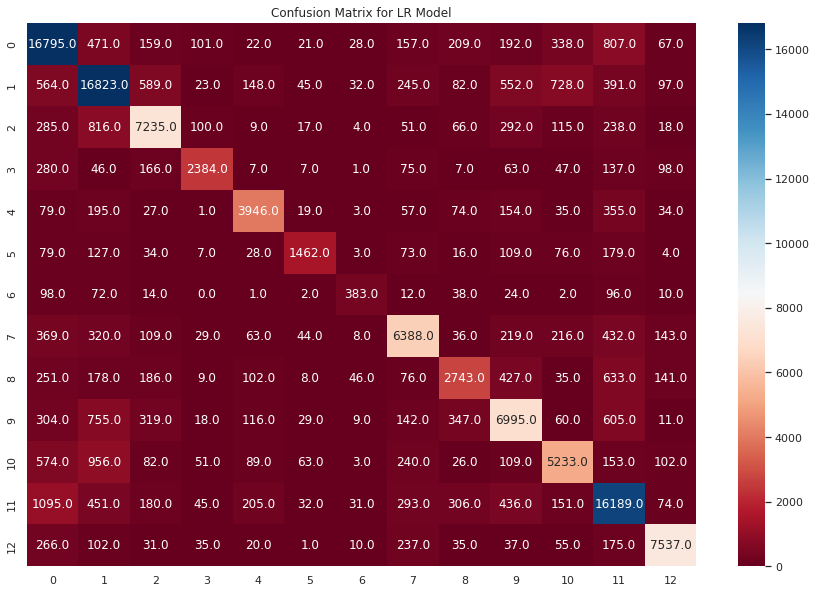

In [83]:
plt.figure(figsize=(15,10))
CM_LR = confusion_matrix(y_test, y_pred_LR) 
sns.heatmap(CM_LR, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for LR Model")
plt.show()

In [84]:
# Function to plot confusion matrix. 
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    

In [85]:
classes=data.category.unique()

Accuracy:  0.7921369593212635


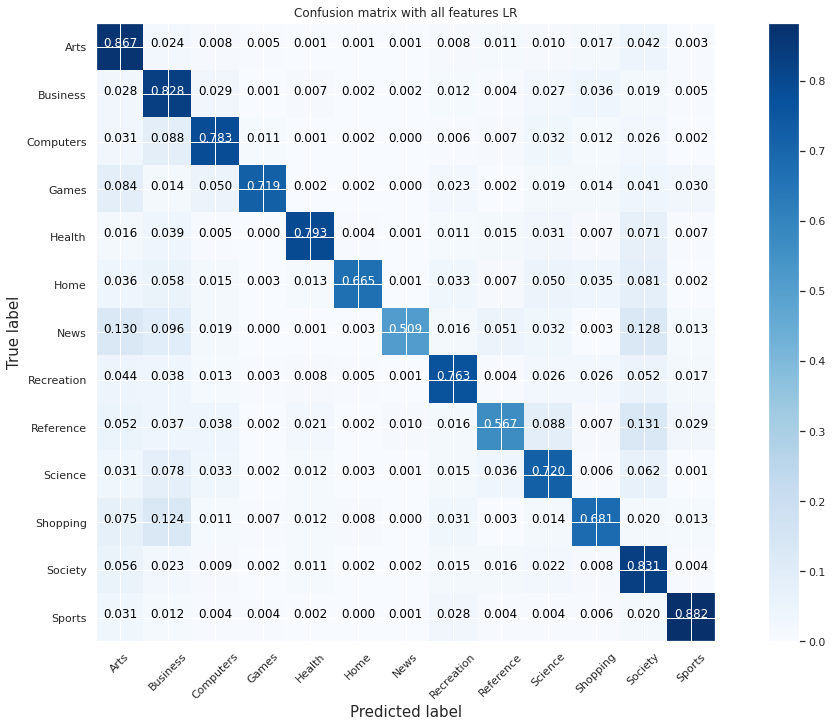

In [86]:
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_LR))

# print the confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(CM_LR, classes=classes,normalize=True,
                      title='Confusion matrix with all features LR')

<a id="43"></a>
## *2. Light Gradient Boosting Classifier*

In [97]:
from lightgbm import LGBMClassifier

In [98]:
LGBM = LGBMClassifier()
# Step 2:Train the classifier and predict for test data
%time LGBM.fit(X_train, y_train)

CPU times: user 46min 28s, sys: 4.18 s, total: 46min 32s
Wall time: 26min 20s


LGBMClassifier()

In [99]:
%time y_pred_LGBM = LGBM.predict(X_test)
y_pred_LGBM

CPU times: user 2min 18s, sys: 145 ms, total: 2min 18s
Wall time: 1min 14s


array([ 7,  7,  8, ..., 12, 10, 11])

In [100]:
Acc_LGBM = accuracy_score(y_pred_LGBM, y_test)

print('Accuracy of LightGBM Classifier:', Acc_LGBM)

Accuracy of LightGBM Classifier : 0.7473928742772012


In [101]:
# Step 3: Evaluate the classifier using various measures

report = classification_report(y_pred_LGBM, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     20043
           1       0.79      0.75      0.77     21664
           2       0.72      0.73      0.73      9084
           3       0.70      0.82      0.76      2861
           4       0.76      0.78      0.77      4851
           5       0.70      0.79      0.74      1939
           6       0.54      0.63      0.58       642
           7       0.69      0.79      0.73      7293
           8       0.60      0.65      0.62      4456
           9       0.64      0.71      0.67      8703
          10       0.61      0.69      0.65      6835
          11       0.79      0.70      0.74     21998
          12       0.86      0.87      0.87      8440

    accuracy                           0.75    118809
   macro avg       0.71      0.75      0.73    118809
weighted avg       0.75      0.75      0.75    118809



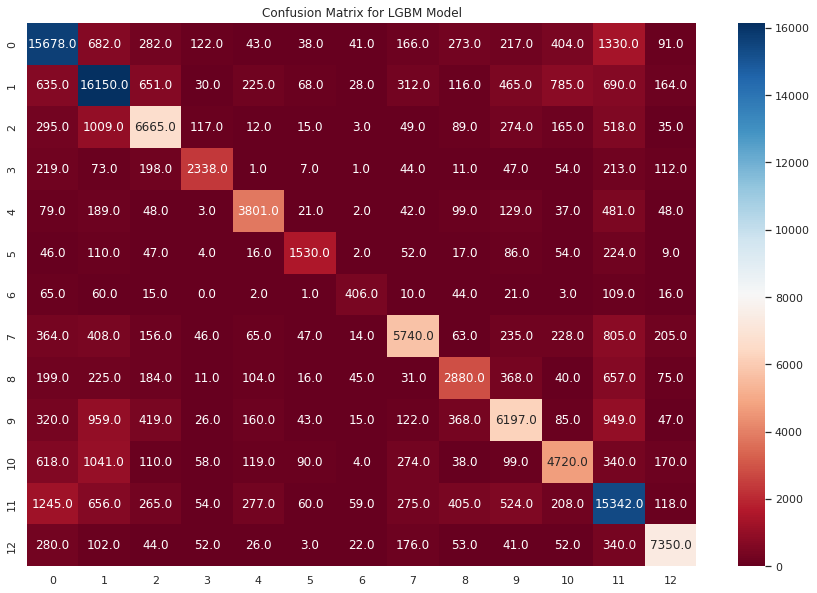

In [102]:
plt.figure(figsize=(15,10))
CM_LGBM = confusion_matrix(y_test, y_pred_LGBM) 
sns.heatmap(CM_LGBM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for LGBM Model")
plt.show()

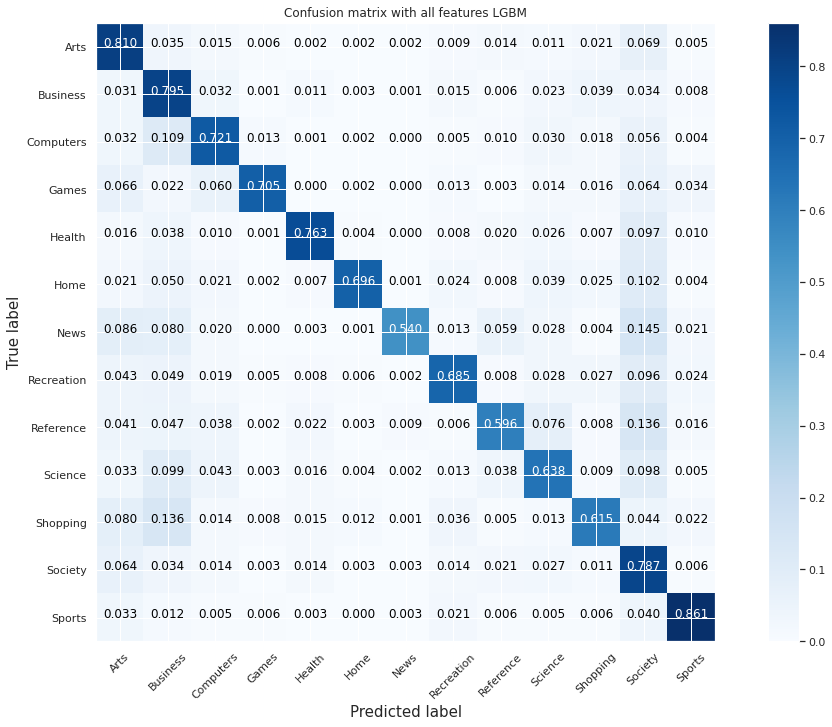

In [103]:
# print the confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(CM_LGBM, classes=classes,normalize=True,
                      title='Confusion matrix with all features LGBM')

<a id="44"></a>

## 3. *Multinomial naive bayes* :

In [104]:
from sklearn.naive_bayes import MultinomialNB

In [105]:
MNB = MultinomialNB()
# Step 2:Train the classifier and predict for test data
%time MNB.fit(X_train,y_train)

CPU times: user 516 ms, sys: 85 ms, total: 601 ms
Wall time: 600 ms


MultinomialNB()

In [106]:
%time y_pred_MNB = MNB.predict(X_test)
y_pred_MNB

CPU times: user 45.3 ms, sys: 2.03 ms, total: 47.4 ms
Wall time: 44.7 ms


array([ 7,  7, 11, ..., 12, 10,  0])

In [107]:
# Step 3: Evaluate the classifier using various measures

Acc_MNB = accuracy_score(y_pred_MNB, y_test)
print('Train Accuracy of MultinomialNB Classifier :', accuracy_score(MNB.predict(X_train), y_train))
print('Test Accuracy of MultinomialNB Classifier :', Acc_MNB)

Train Accuracy of MultinomialNB Classifier : 0.7491244067241822
Test Accuracy of MultinomialNB Classifier : 0.7307611376242541


In [108]:
report = classification_report(y_pred_MNB, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.71      0.79     24666
           1       0.88      0.65      0.75     27664
           2       0.69      0.84      0.76      7617
           3       0.41      0.97      0.58      1422
           4       0.59      0.90      0.71      3261
           5       0.36      0.95      0.52       822
           6       0.00      1.00      0.01         3
           7       0.64      0.85      0.73      6354
           8       0.22      0.80      0.34      1339
           9       0.61      0.79      0.69      7468
          10       0.47      0.80      0.59      4536
          11       0.86      0.65      0.74     25591
          12       0.85      0.90      0.87      8066

    accuracy                           0.73    118809
   macro avg       0.58      0.83      0.62    118809
weighted avg       0.80      0.73      0.75    118809



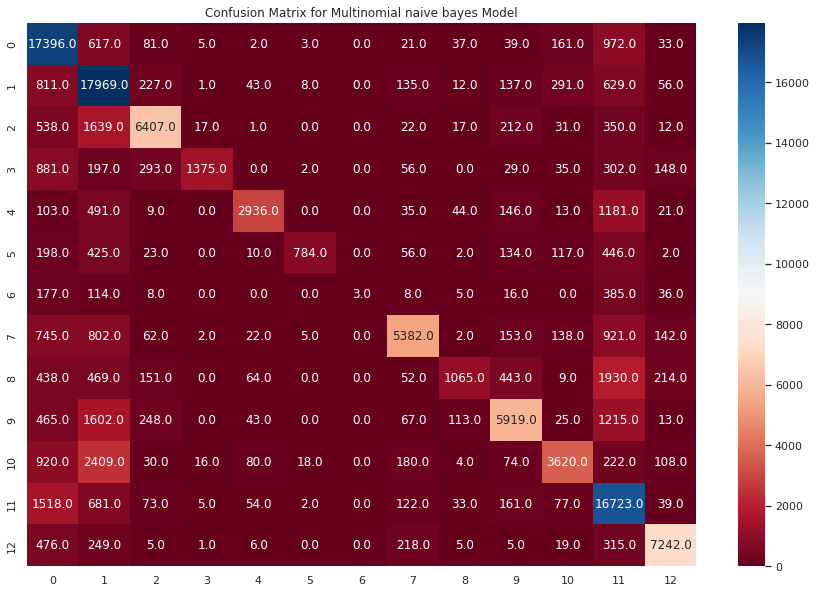

In [109]:
plt.figure(figsize=(15,10))
CM_MNB = confusion_matrix(y_test, y_pred_MNB) 
sns.heatmap(CM_MNB, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for Multinomial naive bayes Model")
plt.show()

Accuracy:  0.7307611376242541


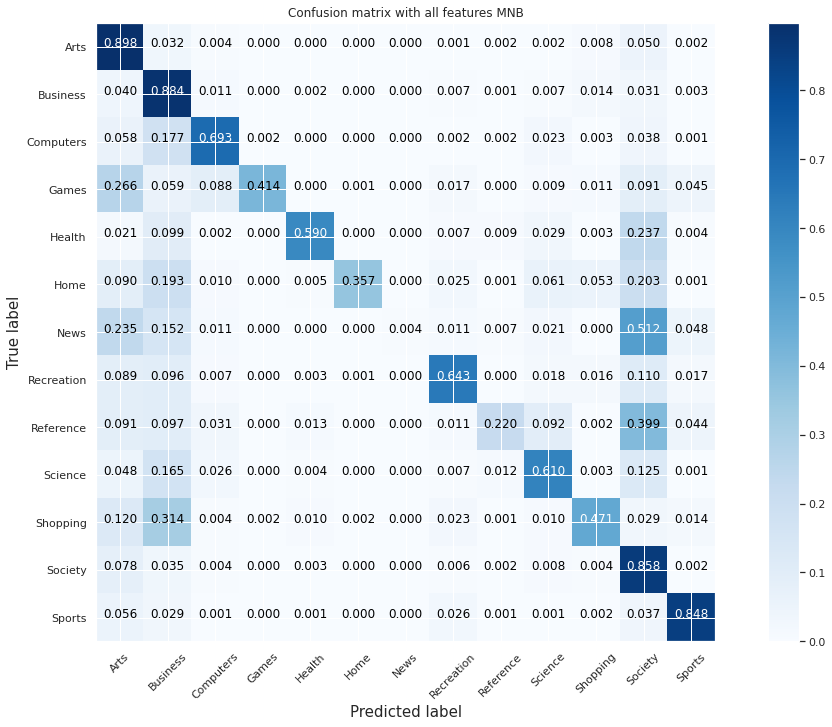

In [110]:
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_MNB))

# print the confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(CM_MNB, classes=classes,normalize=True,
                      title='Confusion matrix with all features MNB')

<a id="45"></a>

## 4. *Support Vector Machine* :

In [111]:
svm=LinearSVC()
# Step 2:Train the classifier and predict for test data
%time svm.fit(X_train,y_train) # train the model(timing it with an IPython "magic command")

CPU times: user 1min 30s, sys: 235 ms, total: 1min 30s
Wall time: 1min 31s


LinearSVC()

In [112]:
%time y_pred_svm = svm.predict(X_test)

CPU times: user 36.2 ms, sys: 0 ns, total: 36.2 ms
Wall time: 35.3 ms


In [113]:
# Step 3: Evaluate the classifier using various measures

Acc_svm = accuracy_score(y_pred_svm, y_test)
print('Train Accuracy of SVM Classifier:', accuracy_score(svm.predict(X_train), y_train))
print('Test Accuracy of SVM Classifier:', Acc_svm)

Train Accuracy of SVM Classifier: 0.8822538635991677
Test Accuracy of SVM Classifier: 0.8187679384558408


In [114]:
report = classification_report(y_pred_svm, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     20725
           1       0.85      0.80      0.82     21463
           2       0.81      0.83      0.82      9036
           3       0.80      0.88      0.84      3020
           4       0.84      0.84      0.84      4945
           5       0.74      0.81      0.77      1997
           6       0.55      0.70      0.61       589
           7       0.79      0.83      0.81      8031
           8       0.60      0.71      0.65      4060
           9       0.76      0.78      0.77      9487
          10       0.68      0.75      0.72      6975
          11       0.85      0.83      0.84     19930
          12       0.92      0.92      0.92      8551

    accuracy                           0.82    118809
   macro avg       0.77      0.81      0.79    118809
weighted avg       0.82      0.82      0.82    118809



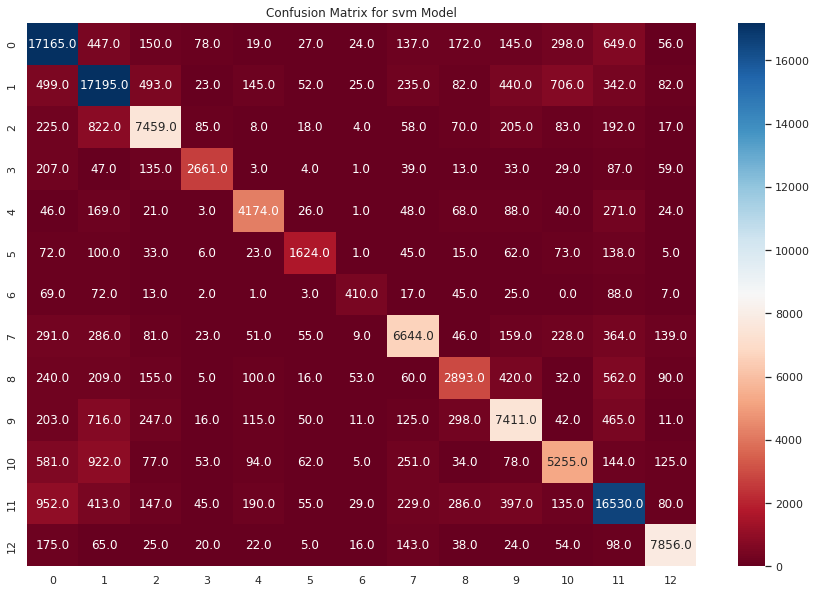

In [115]:
plt.figure(figsize=(15,10))
CM_svm = confusion_matrix(y_test, y_pred_svm) 
sns.heatmap(CM_svm, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for svm Model")
plt.show()

Accuracy:  0.8187679384558408


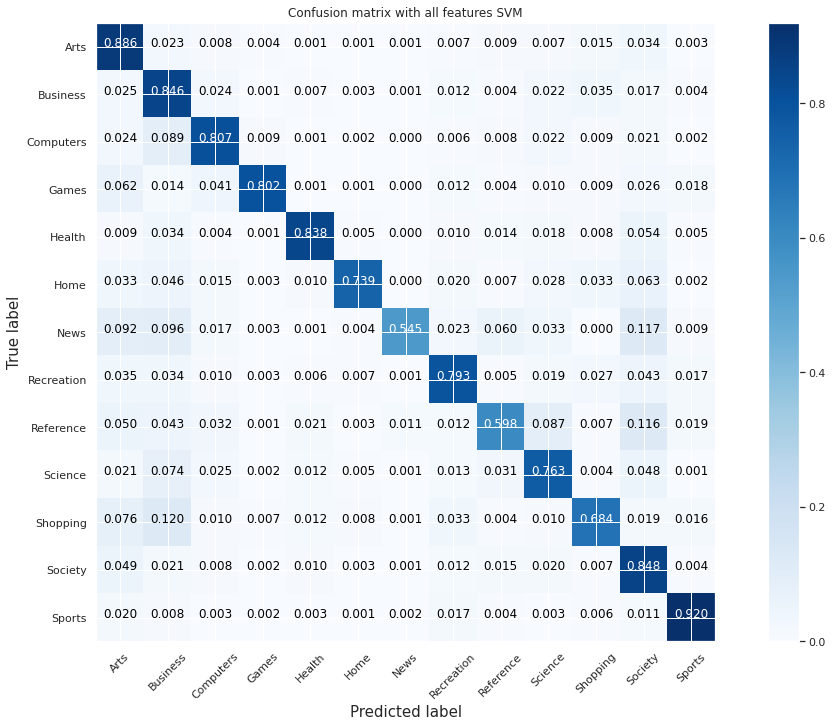

In [116]:
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))

    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix, classes=classes,normalize=True,
                      title='Confusion matrix with all features SVM')

<a id="46"></a>

--------
## Prepare Final Data

* Balance Data to 100k samples from each class
* Delete News, Reference, Home


In [117]:
df1

category                           Clean_title  \
0               0                             animation   
1               0                             toonhound   
2               0  enculturation mouse mouse overcoming   
3               0          digital fx history animation   
4               0                   spark genius genius   
...           ...                                   ...   
1195846        12                              maxpreps   
1195847        12                                 score   
1195848        12                      illustrated high   
1195849        12                      illustrated high   
1195850        12                        usa today prep   

                                                Clean_desc  
0        keep development animation skill level downloa...  
1        british cartoon animation comic strip creation uk  
2        essay patricia pisters animated image changing...  
3        michael crandol take exhaustive look animation...  
4        chris romano feel proliferation flash web anim...  
...                                                    ...  
1195846  high school sport athlete well sport statistic...  
1195847  high school sport score standing schedule rost...  
1195848                  analysis commentary feature score  
1195849                             headline feature story  
1195850  high school super 25 index basketball baseball...  

[1188084 rows x 3 columns]

In [118]:
da=pd.DataFrame()
for i in range(13):
    if i  in [0, 11, 1]:
        d=df1.query("category=={}".format(i)).sample(n = 100000, replace = True)
        da=pd.concat([ da,d], axis=0)
    else:
        da=pd.concat([da,df1.query("category=={}".format(i))])
#da=da.query("category!={}".format(5))

da.head()

category                               Clean_title  \
27894          0                                  airbrush   
157555         0                                 blau andy   
29763          0  hitchiker hitchhiker galaxy encyclopedia   
71049          0                                ring cycle   
103149         0                               barker paul   

                                               Clean_desc  
27894               airbrush work airbrush artist johnson  
157555  zoltan adequate geek magician renaissance peri...  
29763   encyclopedic reference hitchiker guide galaxy ...  
71049   page covering release ring series image downloads  
103149                                     work biography

In [119]:
da = da.query('category != 5 and category != 6 and category !=8 and category != 3')

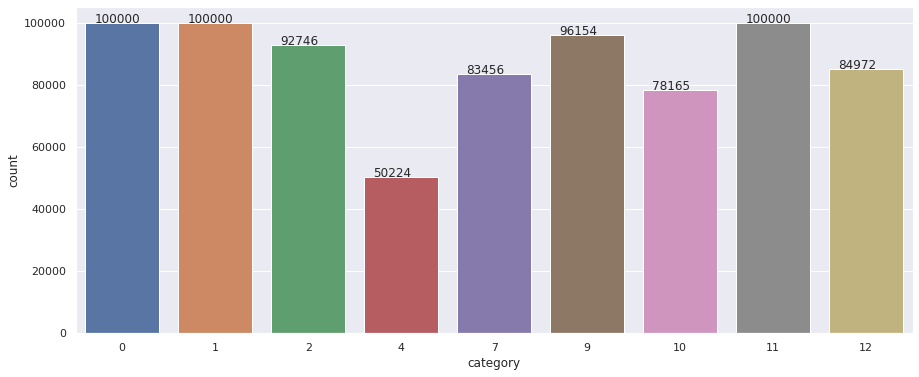

In [120]:
plt.figure( figsize=(15,6))
ax = sns.countplot(x='category', data=da)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

In [121]:
X = da['Clean_desc']+" "+da['Clean_title']
y = da['category']
VecModel = TfidfVectorizer()
X = VecModel.fit_transform(X)
print(f'The new shape for X is {X.shape}')

The new shape for X is (785717, 337996)


In [122]:
#FeatureSelection
from sklearn.feature_selection import SelectPercentile , f_classif 
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=50)
X = FeatureSelection.fit_transform(X, y)

In [123]:
print('X Shape is ' , X.shape)

X Shape is  (785717, 168998)


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=40, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (707145, 168998)
X_test shape is  (78572, 168998)
y_train shape is  (707145,)
y_test shape is  (78572,)


In [125]:
print(pd.value_counts(y_train))

0     90060
1     90043
11    89948
9     86507
2     83335
12    76530
7     75114
10    70399
4     45209
Name: category, dtype: int64


In [126]:
print(X_train.shape, y_train.shape)
pd.value_counts(y_train)

(707145, 168998) (707145,)


0     90060
1     90043
11    89948
9     86507
2     83335
12    76530
7     75114
10    70399
4     45209
Name: category, dtype: int64

In [127]:
svm2=LinearSVC()
%time svm2.fit(X_train,y_train)

CPU times: user 36.6 s, sys: 24.9 ms, total: 36.6 s
Wall time: 36.7 s


LinearSVC()

In [128]:
%time y_pred_svm2 = svm2.predict(X_test)

CPU times: user 18.5 ms, sys: 961 µs, total: 19.4 ms
Wall time: 19.2 ms


In [129]:
Acc_svm2 = accuracy_score(y_pred_svm2, y_test)
print('Train Accuracy of SVM2 Classifier:', accuracy_score(svm2.predict(X_train), y_train))
print('Test Accuracy of SVM2 Classifier:', Acc_svm2)

Train Accuracy of SVM2 Classifier: 0.9113392585679033
Test Accuracy of SVM2 Classifier: 0.8524283459756656


In [130]:
report = classification_report(y_pred_svm2, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86     10383
           1       0.81      0.80      0.80      9987
           2       0.88      0.86      0.87      9580
           4       0.87      0.89      0.88      4927
           7       0.83      0.86      0.84      8099
           9       0.84      0.83      0.84      9687
          10       0.77      0.81      0.79      7460
          11       0.86      0.86      0.86     10001
          12       0.94      0.94      0.94      8448

    accuracy                           0.85     78572
   macro avg       0.85      0.85      0.85     78572
weighted avg       0.85      0.85      0.85     78572



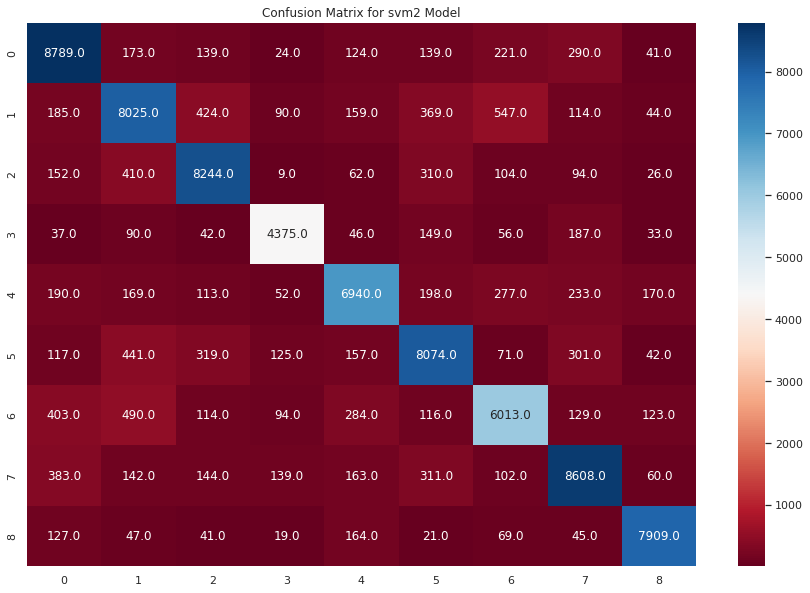

In [131]:
plt.figure(figsize=(15,10))
CM_svm2 = confusion_matrix(y_test, y_pred_svm2) 
sns.heatmap(CM_svm2, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for svm2 Model")
plt.show()

In [132]:
classess = ["Arts","Business","Computers","Health","Recreation","Science","Shopping","Society","Sports"]

Accuracy:  0.8524283459756656


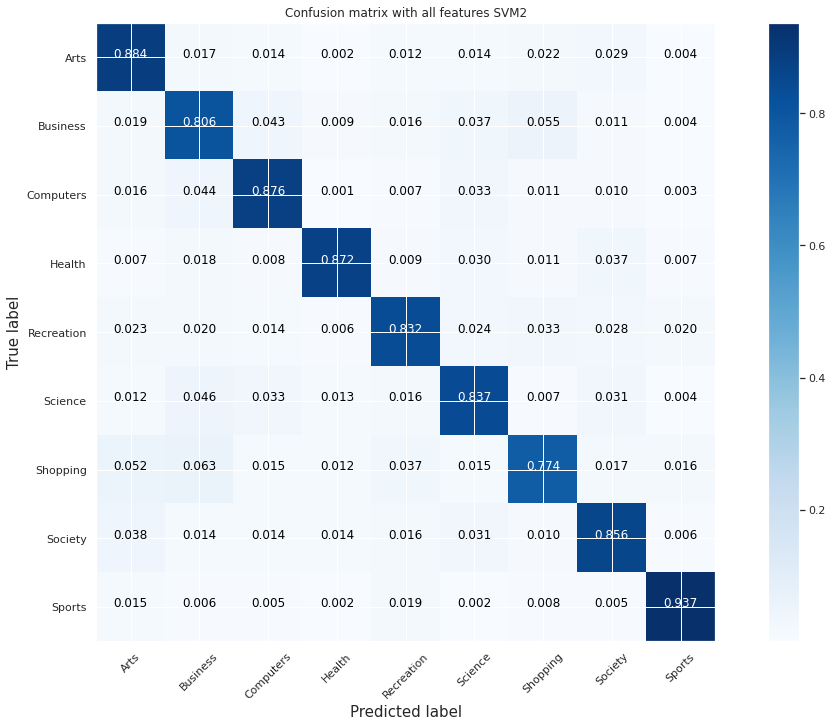

In [133]:
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_svm2))

# print the confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(CM_svm2, classes=classess,normalize=True,
                      title='Confusion matrix with all features SVM2')

<a id="47"></a>

## 5. Random Forest Classifier

-------------------------

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rfc=RandomForestClassifier()
%time rfc.fit(X_train,y_train)

CPU times: user 3h 54min 52s, sys: 14 s, total: 3h 55min 6s
Wall time: 3h 56min 21s


RandomForestClassifier()

In [157]:
%time y_pred_rfc = rfc.predict(X_test)

CPU times: user 17.7 s, sys: 11 ms, total: 17.7 s
Wall time: 17.8 s


In [158]:
Acc_rfc = accuracy_score(y_pred_rfc, y_test)
print('Test Accuracy of RFC  :', Acc_rfc)
print('Train Accuracy of RFC  :', accuracy_score(rfc.predict(X_train), y_train))


Train Accuracy of RFC  : 0.8546384462322371
Test Accuracy of RFC  : 0.8246321844932036


In [159]:
report = classification_report(y_pred_rfc, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85     10569
           1       0.83      0.80      0.81     10348
           2       0.86      0.77      0.81     10455
           4       0.81      0.87      0.84      4685
           7       0.77      0.83      0.80      7707
           9       0.75      0.80      0.77      9044
          10       0.76      0.79      0.77      7505
          11       0.84      0.86      0.85      9769
          12       0.91      0.90      0.91      8490

    accuracy                           0.82     78572
   macro avg       0.82      0.83      0.82     78572
weighted avg       0.83      0.82      0.82     78572



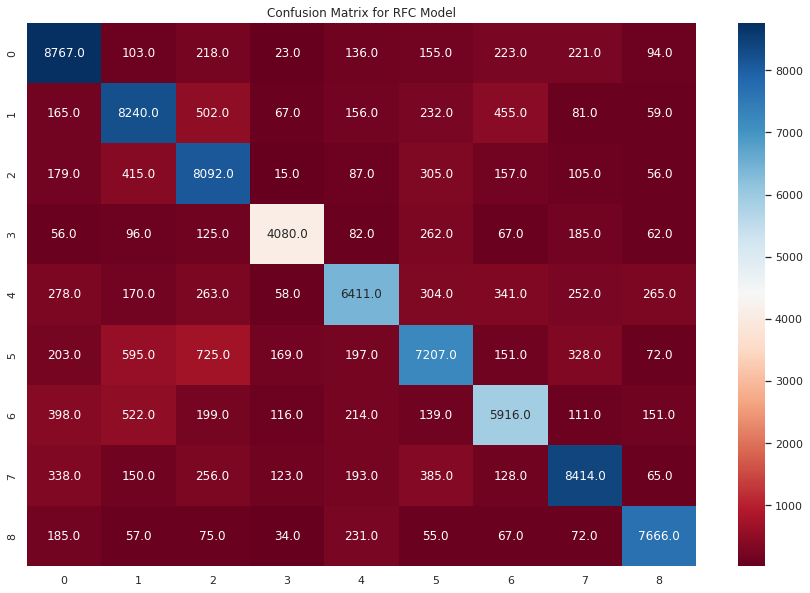

In [160]:
plt.figure(figsize=(15,10))
CM_rfc = confusion_matrix(y_test, y_pred_rfc) 
sns.heatmap(CM_rfc, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for RFC Model")
plt.show()

Accuracy:  0.8246321844932036


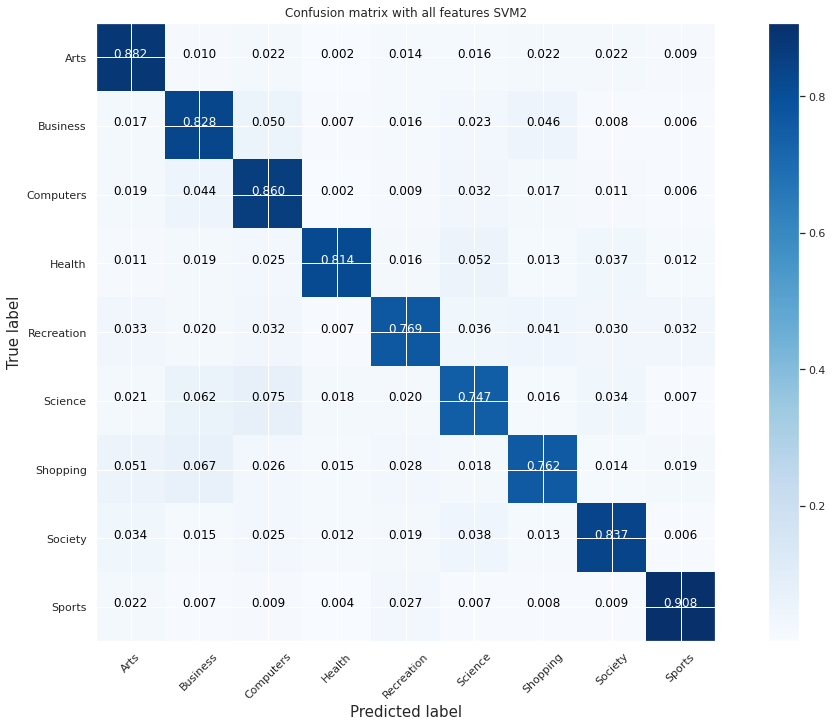

In [161]:
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_rfc))

# print the confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(CM_rfc, classes=classess,normalize=True,
                      title='Confusion matrix with all features SVM2')

<a id="48"></a>

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;padding:18px">Evaluation</p>
<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

In [169]:
dict1 = {"Model Name":["Logistic Regression", "Light Gradient Boosting Classifier", "Multinomial Naive Bayes", "Support Vector Machine","Support Vector Machine2", "Random Forest Classifier"],
         "Train Accuarcy" : [accuracy_score(LR.predict(X_train), y_train), accuracy_score(LGBM.predict(X_train), y_train),accuracy_score(MNB.predict(X_train), y_train),accuracy_score(svm.predict(X_train), y_train),
                            accuracy_score(svm2.predict(X_train), y_train), accuracy_score(rfc.predict(X_train), y_train)],
         "Test Accuarcy" : [LR.score(X_test, y_test), Acc_LGBM, Acc_MNB, Acc_svm, Acc_svm2, Acc_rfc]}
evalDf = pd.Dataframe(dict1)

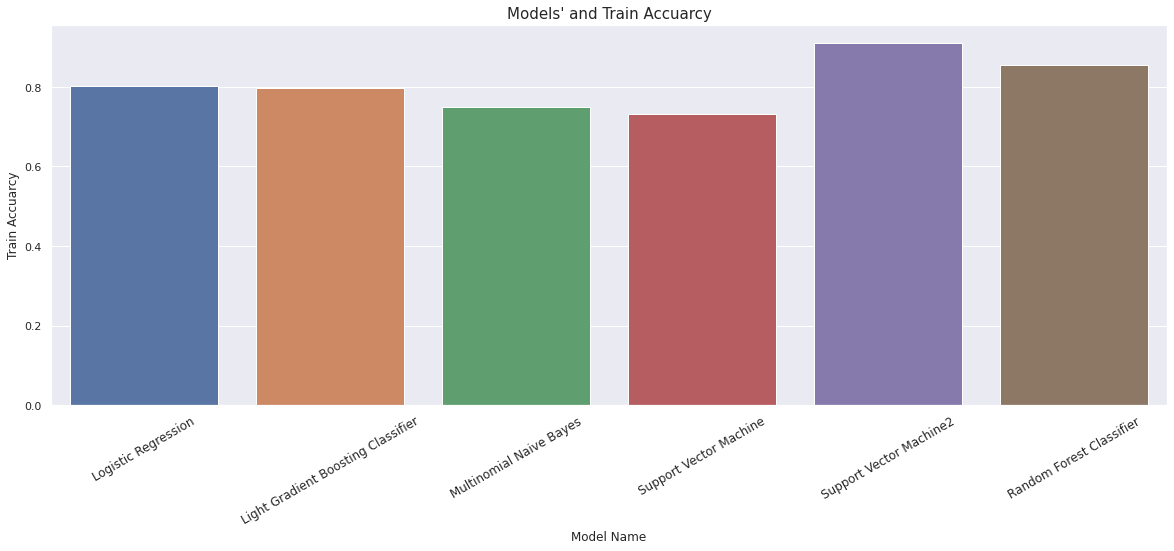

In [172]:
evalDf.sort_values(by="Train Accuarcy")
plt.figure(figsize=(20,7))
sns.barplot(x=evalDf["Model Name"], y=evalDf["Train Accuarcy"])
plt.title("Models' and Train Accuarcy", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

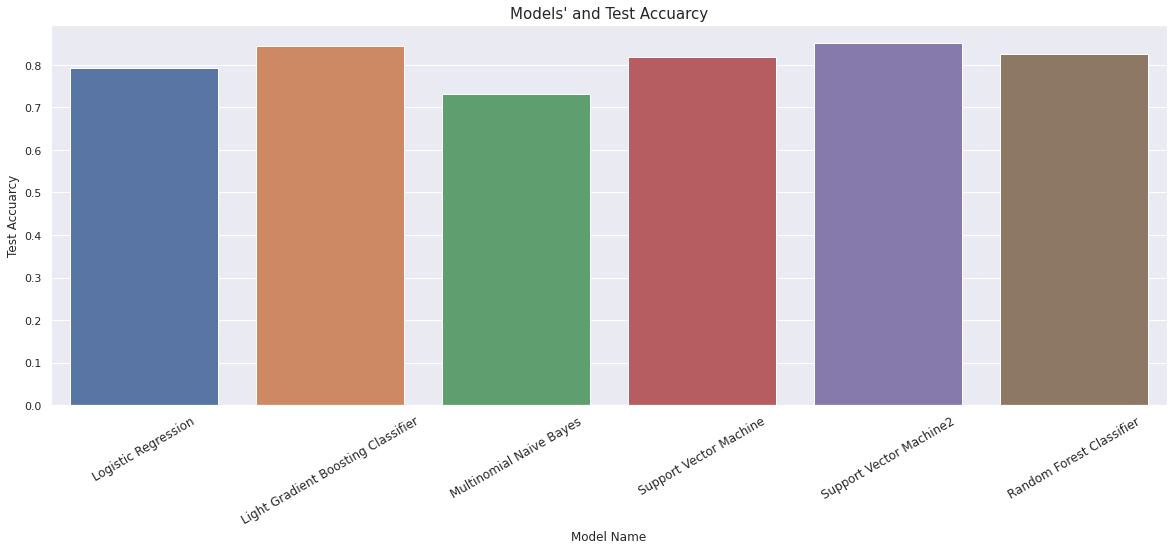

In [174]:
evalDf.sort_values(by="Test Accuarcy")
plt.figure(figsize=(20,7))
sns.barplot(x=evalDf["Model Name"], y=evalDf["Test Accuarcy"])
plt.title("Models' and Test Accuarcy", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

-----------------
<a id="49"></a>

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;padding:18px">Deep Learning Approach</p>


### We will perepare data for Deep Learning Model in the following steps:
  1. **[One Hot Encoding](#50)**
  2. **[Tokenization and Pad Squence](#51)**
  4. **[Glove Embedding](#52)**
  1. **[Build Model Archtiture](#55)**
  2. **[Train Model Archtiture](#56)**
  3. **[Evaluate Model Archtiture](#57)**
 
<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

---------
<a id='50'></a>

## 1. One Hot Encoding

In [74]:
df2

category  Number of Characters in desc  Number of Characters in title  \
0           Arts                           122                             26   
1           Arts                            91                              9   
2           Arts                           103                             58   
3           Arts                           145                             42   
4           Arts                           157                             35   
...          ...                           ...                            ...   
1195846   Sports                           153                             12   
1195847   Sports                           122                              8   
1195848   Sports                            57                             38   
1195849   Sports                            34                             38   
1195850   Sports                           134                             16   

                                 desc_Removal_punctuations  \
0        keep up with developments in online animation ...   
1        british cartoon  animation and comic strip cre...   
2        essay by patricia pisters on the animated imag...   
3        michael crandol takes an exhaustive look at th...   
4        chris romano feels that the proliferation of f...   
...                                                    ...   
1195846  high school sports and athletes as well as spo...   
1195847  high school sports scores  standings  and sche...   
1195848  news  analysis  commentary  feature articles  ...   
1195849                 headline news and feature stories    
1195850  features high school news and the super 25 ind...   

                                title_Removal_punctuations  \
0                               about com  animation guide   
1                                                toonhound   
2        enculturation  from mouse to mouse  overcoming...   
3               digital media fx  the history of animation   
4                      spark online  only genius is genius   
...                                                    ...   
1195846                                       maxpreps com   
1195847                                           my score   
1195848             sports illustrated  high school sports   
1195849             sports illustrated  high school sports   
1195850                                   usa today  preps   

                                                Clean_desc  \
0        keep development animation skill level downloa...   
1        british cartoon animation comic strip creation uk   
2        essay patricia pisters animated image changing...   
3        michael crandol take exhaustive look animation...   
4        chris romano feel proliferation flash web anim...   
...                                                    ...   
1195846  high school sport athlete well sport statistic...   
1195847  high school sport score standing schedule rost...   
1195848                  analysis commentary feature score   
1195849                             headline feature story   
1195850  high school super 25 index basketball baseball...   

                                  Clean_title  \
0                                   animation   
1                                   toonhound   
2        enculturation mouse mouse overcoming   
3                digital fx history animation   
4                         spark genius genius   
...                                       ...   
1195846                              maxpreps   
1195847                                 score   
1195848                      illustrated high   
1195849                      illustrated high   
1195850                        usa today prep   

         Number of Characters in Clean_desc  \
0                                        74   
1                                        49   
2                                        75   
3                      

In [75]:
df2 = df2.query('category != "News" and category != "Home" and category != "Reference" and category != "Games"')

In [76]:
df2['Clean_desc'] = df2['Clean_title']+" "+df2['Clean_desc']
# One-hot-encoding label
category = pd.get_dummies(df2.category)
new_df = pd.concat([df2, category], axis=1)
new_df = new_df.drop(columns='category')

In [77]:
texts = new_df['Clean_desc'].values
label = new_df[["Arts", "Business", "Computers", "Health", "Recreation", "Science", "Shopping", "Society", "Sports"]].values

from sklearn.model_selection import train_test_split
train_texts, test_texts, train_label, test_label = train_test_split(texts, label, test_size=0.10)

In [78]:
train_texts.shape

(970100,)

In [79]:
# Stopword removal dan porter steemming teks
import numpy as np
from gensim.parsing.preprocessing import remove_stopwords


fixed_train_texts = []
for text in train_texts:
    removed_text = remove_stopwords(text)   # Stopword removal
    fixed_train_texts.append(removed_text)

fixed_train_texts = np.array(fixed_train_texts, dtype='O')   # Train set 

fixed_test_texts = []
for text in test_texts:
    removed_text = remove_stopwords(text)
    fixed_test_texts.append(removed_text)

fixed_test_texts = np.array(fixed_test_texts, dtype='O')  # Test set

In [80]:
print(f'text ({len(train_texts[0])}): {train_texts[0]}')
print(f'removed ({len(fixed_train_texts[0])}): {fixed_train_texts[0]} ({len(fixed_train_texts[0])})')

text (62): rfc 1217 memo consortium slow commotion cscr g cerf april 1991
removed (62): rfc 1217 memo consortium slow commotion cscr g cerf april 1991 (62)


<a id='51'></a>
# 3. Tokenization and Pad Sequence

In [85]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_tokens = 17
tokenizer = Tokenizer()
tokenizer.fit_on_texts(fixed_train_texts)
tokenizer.fit_on_texts(fixed_test_texts)

train_sequences = tokenizer.texts_to_sequences(fixed_train_texts)
test_sequences = tokenizer.texts_to_sequences(fixed_test_texts)

padded_train = pad_sequences(train_sequences, maxlen=max_tokens, padding="post", truncating="post", value=0.)
padded_test = pad_sequences(test_sequences, maxlen=max_tokens, padding="post", truncating="post", value=0.)
print(padded_train[:3])


[[   623  56199  11065   3401   6898  51387 163230   1874  15760   1784
    3962      0      0      0      0      0      0]
 [ 71112   3092  47544    978   6868   1521  71113   1831   1656    176
    3006      0      0      0      0      0      0]
 [   261   1167      4    961   1167   5435   2367    823    460   5601
    1553     62     94    750   1729      0      0]]


In [86]:
print("Vocab Size : {}".format(len(tokenizer.word_index)))
print(tokenizer.index_word[13])

Vocab Size : 434139
industry


<a id='54'></a>
### Glove Embedding

In [87]:
!wget https://nlp.stanford.edu/data/glove.840B.300d.zip
!unzip glove.840B.300d.zip

--2023-02-15 17:17:06--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2023-02-15 17:17:06--  https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip]
Saving to: ‘glove.840B.300d.zip’

glove.840B.300d.zip 100%[===================>]   2.03G  5.02MB/s    in 6m 49s  

2023-02-15 17:23:57 (5.07 MB/s) - ‘glove.840B.300d.zip’ saved [2176768927/2176768927]

Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [88]:
%%time

import numpy as np

glove_embeddings = {}
with open("glove.840B.300d.txt") as f:
    for line in f:
        try:
            line = line.split()
            glove_embeddings[line[0]] = np.array(line[1:], dtype=np.float32)
        except:
            continue

CPU times: user 1min 54s, sys: 6.81 s, total: 2min
Wall time: 2min 2s


In [92]:
%%time

embed_len = 300

word_embeddings = np.zeros((len(tokenizer.index_word)+1, embed_len))

for idx, word in tokenizer.index_word.items():
    word_embeddings[idx] = glove_embeddings.get(word, np.zeros(embed_len))

CPU times: user 1.09 s, sys: 544 ms, total: 1.63 s
Wall time: 1.64 s


<a id='55'></a>

## 4. Build Model Archtiture

In [95]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.index_word)+1, output_dim=embed_len,
                                               input_length=max_tokens, trainable=False, weights=[word_embeddings]),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2023-02-15 17:33:58.429524: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 520968000 exceeds 10% of free system memory.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 17, 300)           130242000 
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 13, 64)            96064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 9)                

In [96]:
class modelCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\Accuarcy >90%!")
            self.model.stop_training = True
my_callback = modelCallback()

<a id='56'></a>

## 5. Train Model Archtiture

In [98]:
hist = model.fit(
    padded_train, train_label,
    validation_data=(padded_test, test_label),
    epochs=20,
    batch_size=128,
    callbacks=[my_callback])

Epoch 1/20
  11/7579 [..............................] - ETA: 39s - loss: 0.5169 - accuracy: 0.8317 

2023-02-15 17:36:24.945053: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 65966800 exceeds 10% of free system memory.


7579/7579 [==============================] - 34s 4ms/step - loss: 0.5089 - accuracy: 0.8266 - val_loss: 0.5356 - val_accuracy: 0.8194
Epoch 2/20
7579/7579 [==============================] - 35s 5ms/step - loss: 0.4859 - accuracy: 0.8345 - val_loss: 0.5304 - val_accuracy: 0.8201
Epoch 3/20
7579/7579 [==============================] - 35s 5ms/step - loss: 0.4696 - accuracy: 0.8397 - val_loss: 0.5257 - val_accuracy: 0.8212
Epoch 4/20
7579/7579 [==============================] - 34s 5ms/step - loss: 0.4576 - accuracy: 0.8437 - val_loss: 0.5341 - val_accuracy: 0.8209
Epoch 5/20
7579/7579 [==============================] - 35s 5ms/step - loss: 0.4485 - accuracy: 0.8466 - val_loss: 0.5319 - val_accuracy: 0.8219
Epoch 6/20
7579/7579 [==============================] - 34s 5ms/step - loss: 0.4404 - accuracy: 0.8488 - val_loss: 0.5458 - val_accuracy: 0.8192
Epoch 7/20
7579/7579 [==============================] - 35s 5ms/step - loss: 0.4339 - accuracy: 0.8513 - val_loss: 0.5396 - val_accuracy: 0.8

<a id='57'></a>

## 6. Evaluate Model Archtiture

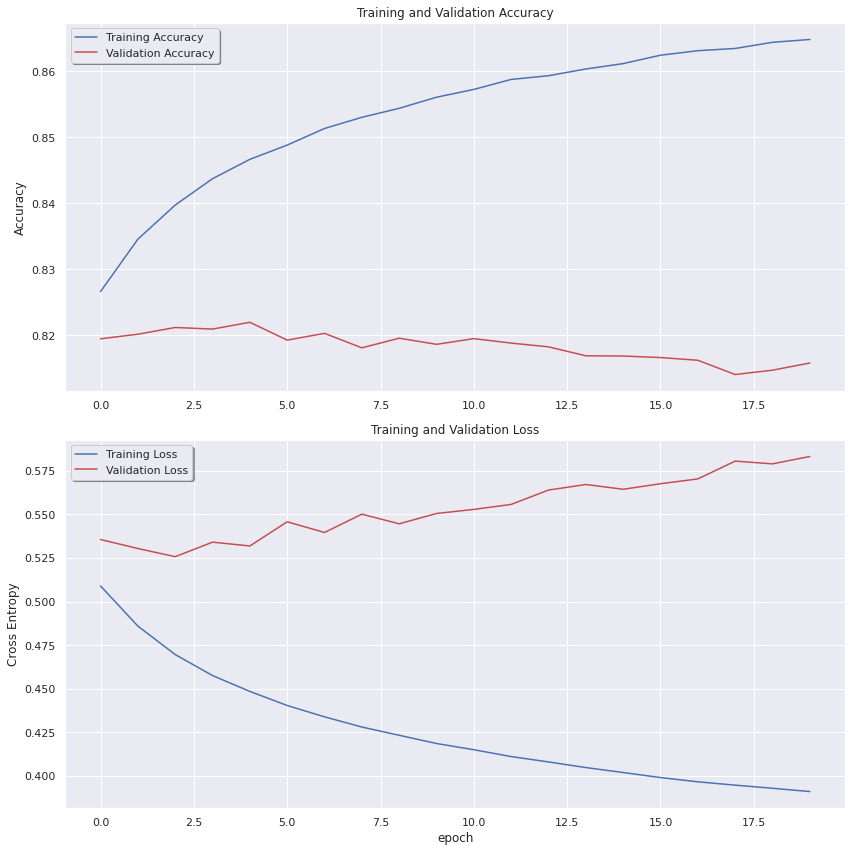

In [99]:
sns.set()
acc =  hist.history['accuracy']
val_acc =  hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

#Plot Training Accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(acc, color='b', label='Training Accuracy')
ax1.plot(val_acc, color='r', label='Validation Accuracy')
#make Legend
ax1.legend(loc='best', shadow=True)
#put label name 
ax1.set_ylabel('Accuracy')
#put title name
ax1.set_title('Training and Validation Accuracy')


#Plot Training Loss
ax2.plot(loss, color='b', label='Training Loss')
ax2.plot(val_loss, color='r', label='Validation Loss')

#make Legend
ax2.legend(loc='best', shadow=True)
#put label name 
ax2.set_ylabel('Cross Entropy')
ax2.set_xlabel('epoch')
#put label name 
ax2.set_title('Training and Validation Loss')
plt.tight_layout()
plt.show()

In [179]:
classes = np.unique(train_label)
mapping = dict(zip(classes, target_classes))

len(fixed_train_texts), len(fixed_test_texts), classes, mapping

(970100, 107789, array([0, 1], dtype=uint8), {0: 'Arts', 1: 'Business'})

In [100]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Y_preds = model.predict(padded_test).argmax(axis=1)
ytest=np.argmax(test_label, axis=1)

print("Test Accuracy : {}".format(accuracy_score(ytest, Y_preds)))
print("\nClassification Report : ")
print(classification_report(ytest, Y_preds))
print("\nConfusion Matrix : ")
print(confusion_matrix(ytest, Y_preds))

Test Accuracy : 0.8157789755912014

Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     19163
           1       0.80      0.83      0.81     20334
           2       0.79      0.82      0.81      9351
           3       0.84      0.81      0.82      5084
           4       0.82      0.75      0.78      8374
           5       0.75      0.75      0.75      9512
           6       0.74      0.70      0.72      7923
           7       0.84      0.83      0.83     19653
           8       0.90      0.91      0.90      8395

    accuracy                           0.82    107789
   macro avg       0.81      0.81      0.81    107789
weighted avg       0.82      0.82      0.82    107789


Confusion Matrix : 
[[16522   513   262    32   212   231   390   833   168]
 [  410 16843   812   141   186   608   828   420    86]
 [  241   717  7649    24    78   347    89   183    23]
 [   75   205    33  4113    51   175    4

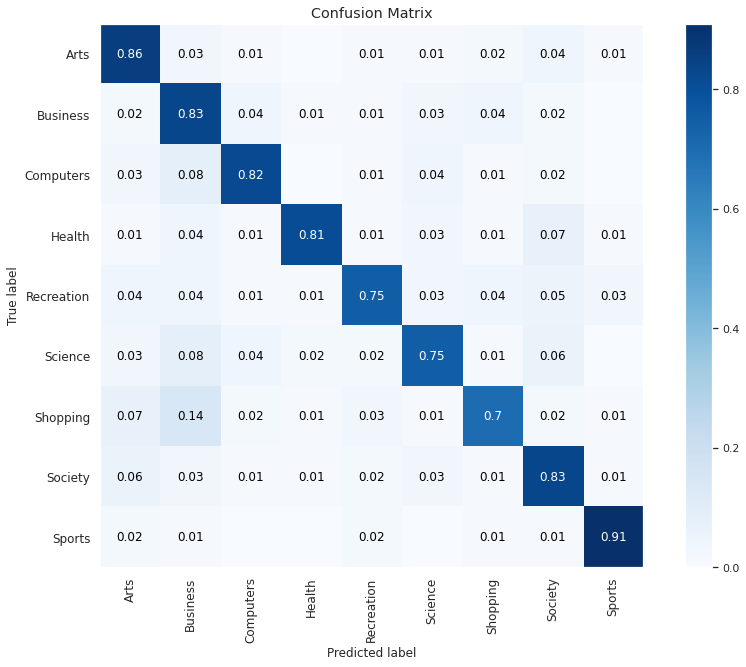

In [102]:
from sklearn.metrics import confusion_matrix
target_classes = ["Arts", "Business", "Computers", "Health", "Recreation", "Science", "Shopping", "Society", "Sports"]

import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np
skplt.metrics.plot_confusion_matrix([target_classes[i] for i in ytest], [target_classes[i] for i in Y_preds],
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Blues",
                                    hide_zeros=True,
                                    figsize=(15,10)
                                    );
plt.xticks(rotation=90);